<a id=top></a>

# **目次**

<b>
    <details>
        <summary>
            <a href=#modules, style="font-size: xx-large">1. モジュールインポート</a>
            <ul>※サードパーティライブラリ>>>自作モジュール>>>（ここまで本ipynb外）>>>自作関数（本ipynb内）</ul>
        </summary>
    </details>

<details>
    <summary>
        <a href=#data , style="font-size: xx-large">2. オリジナルデータインポート</a>
    </summary>
</details>

<details>
    <summary>
        <a href="#all", style="font-size: xx-large">3. 全体</a>
    </summary>
    <table></table>
</details>
    
<details>
    <summary>
        <a href="#sepyear", style="font-size: xx-large">4. 期間ごと</a>
    </summary>
</details>
</b>


---


<a id=modules></a>

## **1. モジュールインポート**


In [1]:
import pandas as pd
import numpy as np
from ecomplexity import ecomplexity
from ecomplexity import proximity
import matplotlib.pyplot as plt

import matplotlib.ticker as ptick
import networkx as nx
import networkx.algorithms.bipartite as bip


In [2]:
# 自作モジュールインポート
from Scripts.kci import df_to_kci as dtk
from Scripts.vizualize import rank as vr
from Scripts.vizualize import distribution as vd


---


<a id=data></a>

## **2. オリジナルデータインポート**


In [3]:
year_start = 1981
year_end = 2010
year_range = 10


In [4]:
# 全体データ
all_reg_num_df = pd.read_csv(f'../Data/0_RegNum/app_{year_start}_{year_end}.csv',  
                     encoding='utf-8', 
                     sep=',', 
                     dtype={'app_year':np.int64, 
                            'right_person_name':object, 
                            'ipc_class':object, 
                            'reg_num':np.float64})
all_reg_num_df


right_person_name ipc_class   reg_num
0                株式会社リコー      G03G  14615.00
1               キヤノン株式会社      G03G  13958.50
2                富士通株式会社      G06F  13040.00
3               キヤノン株式会社      H04N  12151.50
4               日本電気株式会社      G06F  11593.50
...                  ...       ...       ...
290492     アプライドリサーチ株式会社      H04N      0.33
290493      大阪ガスケミカル株式会社      A01P      0.33
290494       積水化成品工業株式会社      H04B      0.33
290495       太平洋セメント株式会社      E05B      0.33
290496      大阪ガスケミカル株式会社      H04N      0.33

[290497 rows x 3 columns]

In [5]:
top_p_list = [3]
for p in top_p_list:
    all_top_df = all_reg_num_df.groupby(['right_person_name'])[['reg_num']].sum().reset_index(drop=False)\
                                    .sort_values(['reg_num'], ascending=False).reset_index(drop=True).copy()

    all_top_p_df = all_top_df.head((len(all_top_df)*p//100)+1)
    
    all_top_p_df = all_reg_num_df[all_reg_num_df['right_person_name'].isin(all_top_p_df['right_person_name'])].copy()
    # all_top_p_df['segment'] = int(period[:4])
    # sep_year_top_p_df_dict[p][period] = sep_year_top_p_df.copy()
    # display(sep_year_top_p_df_dict[p])
    # display(sep_year_top_p_df.head())

In [6]:
all_top_p_df['segment'] = '1981-2010'
trade_cols = {'time':'segment', 'loc':'right_person_name', 'prod':'ipc_class', 'val':'reg_num'}
all_c_df = ecomplexity(all_top_p_df, cols_input=trade_cols).drop_duplicates(subset=['right_person_name', 'diversity'], keep='first')

1981-2010


In [7]:
all_c_df#['diversity'].max()

right_person_name ipc_class  reg_num    segment  diversity  ubiquity  \
0               あすか製薬株式会社      A01B      0.0  1981-2010         17        48   
627            いすゞ自動車株式会社      A01B      0.0  1981-2010         80        48   
1254            しげる工業株式会社      A01B      0.0  1981-2010         23        48   
1881             ぺんてる株式会社      A01B      0.0  1981-2010         52        48   
2508            みのる産業株式会社      A01B     15.0  1981-2010         18        48   
...                   ...       ...      ...        ...        ...       ...   
1211991           ＵＢＥ株式会社      A01B      0.0  1981-2010         95        48   
1212618       ＵＤトラツクス株式会社      A01B      0.0  1981-2010         71        48   
1213245           ＹＫＫ株式会社      A01B      0.0  1981-2010         63        48   
1213872         ＹＫＫＡＰ株式会社      A01B      0.0  1981-2010         32        48   
1214499     Ｚホールデイングス株式会社      A01B      0.0  1981-2010         14        48   

         mcp       eci       pci   density       coi       cog        rca  
0          0  1.667732  0.374633  0.022939  1.124358  0.141140   0.000000  
627        0 -0.425131  0.374633  0.242549 -0.698332  0.240310   0.000000  
1254       0  0.044037  0.374633  0.056088  0.145566  0.169156   0.000000  
1881       0  0.334401  0.374633  0.065454  0.457425  0.144166   0.000000  
2508       1  0.612243  0.374633  0.158748  0.511787  0.000000  50.606174  
...      ...       ...       ...       ...       ...       ...        ...  
1211991    0  0.945821  0.374633  0.138520  1.460553  0.108846   0.000000  
1212618    0 -0.615255  0.374633  0.231219 -1.193364  0.240019   0.000000  
1213245    0  0.372302  0.374633  0.085152  0.835847  0.143950   0.000000  
1213872    0  0.210663  0.374633  0.045850  0.264988  0.153484   0.000000  
1214499    0 -2.329333  0.374633  0.011460 -1.261745  0.165279   0.000000  

[1938 rows x 13 columns]

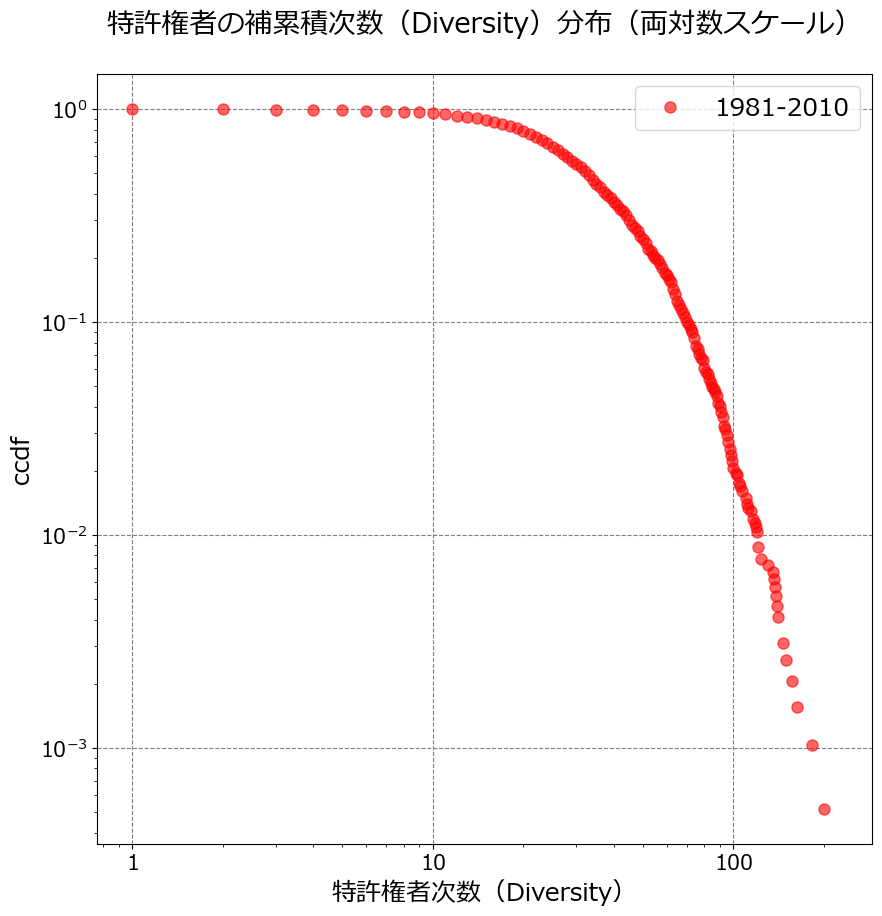

In [8]:
all_c_df
def ccdf(diversity_col: list):
        freq_array = np.array(np.bincount(diversity_col))
        p_list = []
        cumsum = 0.0
        s = float(freq_array.sum())
        for freq in freq_array:
            if freq != 0:
                cumsum += freq / s
                p_list.append(cumsum)
            else:
                p_list.append(1.0)
                
        ccdf_array = 1 - np.array(p_list)
        if ccdf_array[0] == 0:
            ccdf_array[0] = 1.0
        return ccdf_array

color_list = [
    'red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown',
    'grey', 'violet', 'indigo', 'turquoise', 'gold', 'lime', 'coral',
    'navy', 'skyblue', 'tomato', 'olive', 'cyan', 'darkred', 'darkgreen',
    'darkblue', 'darkorange', 'darkviolet', 'deeppink', 'firebrick', 'darkcyan',
    'darkturquoise', 'darkslategray', 'darkgoldenrod', 'mediumblue', 'mediumseagreen',
    'mediumpurple', 'mediumvioletred', 'midnightblue', 'saddlebrown', 'seagreen',
    'sienna', 'steelblue'
    ][10:]

color_count = 0
fig, ax = plt.subplots(figsize=(10, 10))
for s in all_c_df['segment'].unique():
    ccdf_array = ccdf(all_c_df[all_c_df['segment']==s]['diversity'].to_list())
    ax.plot(range(1, len(ccdf_array)+1), ccdf_array, 'o', markersize=8, 
                    color='red', label=s, alpha=0.6)
    color_count += 1
ax.legend(loc='upper right', fontsize=18)

ax.set_title('特許権者の補累積次数（Diversity）分布（両対数スケール）'+'\n', fontsize=20)
ax.set_xlabel('特許権者次数（Diversity）', fontsize=18)
ax.set_ylabel('ccdf', fontsize=18)

ax.set_xscale('log')
ax.set_yscale('log')

# x軸の指数表記を普通に戻す魔法
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))

# ax.set_xlim(prop_dict['xlim'])
# ax.set_ylim(prop_dict['ylim'])

ax.grid(axis='both', 
        which='major', 
        alpha=1, 
        linestyle='--', 
        linewidth=0.8, 
        color='gray')
    
plt.show()

In [9]:
# 各期間データ
sep_year_df_dict = {}
for year in range(year_start, year_end+1, year_range):
    sep_year_reg_num_df = pd.read_csv(f'../Data/0_RegNum/app_{year}_{year+year_range-1}.csv',
                              encoding='utf-8', 
                              sep=',', 
                              dtype={'app_year':np.int64, 
                                     'right_person_name':object, 
                                     'ipc_class':object, 
                                     'reg_num':np.float64})
    # sep_year_reg_num_df = sep_year_reg_num_df[sep_year_reg_num_df['ipc_class'].str[0]=='A']
    # sep_year_reg_num_df['segment'] = year
    display(sep_year_reg_num_df[sep_year_reg_num_df['right_person_name'].str.contains('三栄源')]['right_person_name'].unique())
    sep_year_df_dict[f'{year}-{year+year_range-1}'] = sep_year_reg_num_df.copy()
    # display(sep_year_df.head())
    

array(['三栄源エフ・エフ・アイ株式会社'], dtype=object)

array(['三栄源エフ・エフ・アイ株式会社'], dtype=object)

array(['三栄源エフ・エフ・アイ株式会社'], dtype=object)

In [10]:
# all_reg_num_df = all_reg_num_df.groupby(['right_person_name'])[['reg_num']].sum().reset_index(drop=False)
all_reg_num_df['segment'] = '1981-2010'

for s in sep_year_df_dict.keys():
    # sep_year_df_dict[s] = sep_year_df_dict[s].groupby(['right_person_name'])[['reg_num']].sum().reset_index(drop=False)
    sep_year_df_dict[s]['segment'] = s


In [11]:
right_person_df = pd.concat([all_reg_num_df]+list(sep_year_df_dict.values()), axis='index')
right_person_df


right_person_name ipc_class  reg_num    segment
0                株式会社リコー      G03G  14615.0  1981-2010
1               キヤノン株式会社      G03G  13958.5  1981-2010
2                富士通株式会社      G06F  13040.0  1981-2010
3               キヤノン株式会社      H04N  12151.5  1981-2010
4               日本電気株式会社      G06F  11593.5  1981-2010
...                  ...       ...      ...        ...
149506        日本電波工業株式会社      G03F      1.0  2001-2010
149507        日本電波工業株式会社      G01R      1.0  2001-2010
149508        日本電波工業株式会社      C12M      1.0  2001-2010
149509        日本電波工業株式会社      B65D      1.0  2001-2010
149510   ｗｅａｌｔｈｓｈａｒｅ株式会社      G06Q      1.0  2001-2010

[692952 rows x 4 columns]

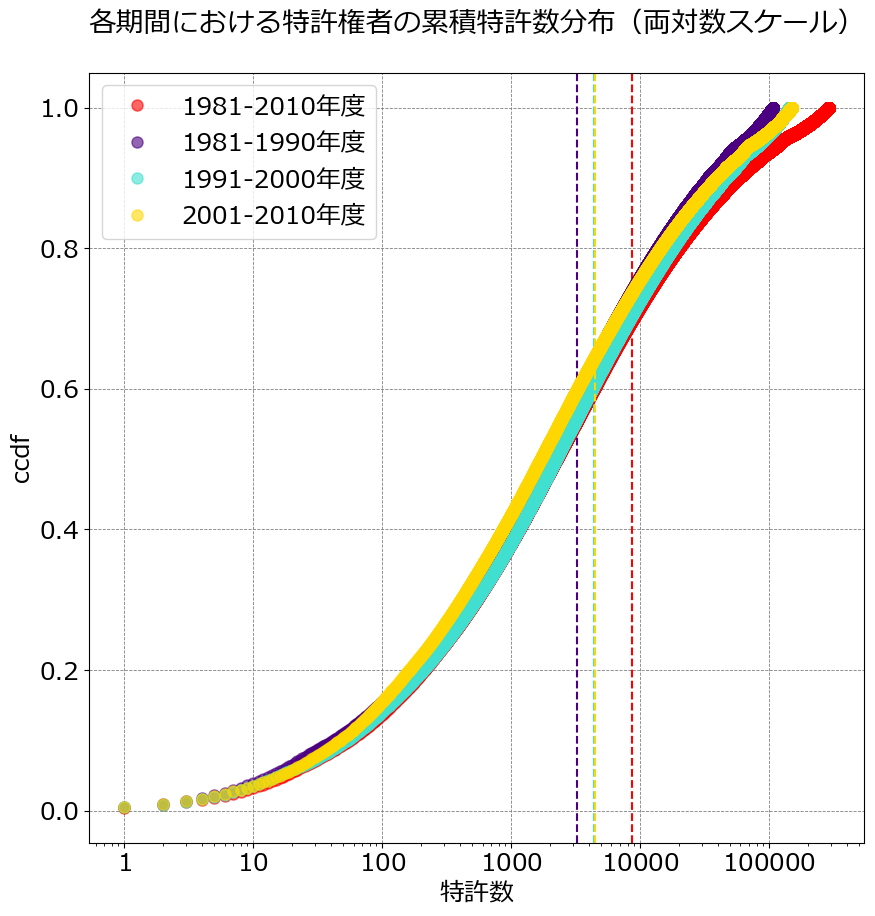

In [12]:
color_list = ['red']+[
    'red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown',
    'grey', 'violet', 'indigo', 'turquoise', 'gold', 'lime', 'coral',
    'navy', 'skyblue', 'tomato', 'olive', 'cyan', 'darkred', 'darkgreen',
    'darkblue', 'darkorange', 'darkviolet', 'deeppink', 'firebrick', 'darkcyan',
    'darkturquoise', 'darkslategray', 'darkgoldenrod', 'mediumblue', 'mediumseagreen',
    'mediumpurple', 'mediumvioletred', 'midnightblue', 'saddlebrown', 'seagreen',
    'sienna', 'steelblue'
    ][10:]
color_count = 0
fig, ax = plt.subplots(figsize=(10, 10))
for s in list(right_person_df['segment'].unique())[0:]:
    
    x = right_person_df[right_person_df['segment']==s][['reg_num']].rank(ascending=False, method='first').sort_values('reg_num', ascending=True)['reg_num']
    # y = 1 - np.cumsum(right_person_df[right_person_df['segment']==s][['reg_num']].sort_values('reg_num',ascending=False)['reg_num'] / right_person_df[right_person_df['segment']==s]['reg_num'].sum())
    y = np.cumsum(right_person_df[right_person_df['segment']==s][['reg_num']].sort_values('reg_num',ascending=False)['reg_num'] / right_person_df[right_person_df['segment']==s]['reg_num'].sum())
    # y = [1] + list(y)[:-1]
    y = list(y)[:-1] + [1]
    # ccdf_array = ccdf()
    # ax.plot(range(1, len(ccdf_array)+1), ccdf_array, 'o', markersize=8, 
    #                 color=color_list[color_count], label=s+'年度', alpha=0.6)
    ax.plot(x, y, 'o', markersize=8, 
                    color=color_list[color_count], label=s+'年度', alpha=0.6)
    ax.axvline(len(x)*3//100, color=color_list[color_count], linestyle='--')
    color_count += 1
# ax.legend(loc='lower left', fontsize=18)
ax.legend(loc='upper left', fontsize=18)

ax.set_title('各期間における特許権者の累積特許数分布（両対数スケール）'+'\n', fontsize=20)
ax.set_xlabel('特許数', fontsize=18)
ax.set_ylabel('ccdf', fontsize=18)

ax.set_xscale('log')
# ax.set_yscale('log')

ax.tick_params(labelsize=18)
# ax.set_xlim(0.8, 300)

# x軸の指数表記を普通に戻す魔法
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))

# ax.set_xlim(prop_dict['xlim'])
# ax.set_ylim(prop_dict['ylim'])

ax.grid(axis='both', 
        which='major', 
        alpha=1, 
        linestyle='--', 
        linewidth=0.6, 
        color='gray')
    
plt.show()


In [13]:
od_df = pd.read_csv('../../1_DataFiltering/Data/Dealed/app.csv', 
            encoding='utf-8', 
            sep=',', 
            dtype={'app_year':np.int64, 
                   'right_person_name':object, 
                   'ipc_class':object, 
                   'reg_num':str})

---


In [14]:
top_p_list = [3]
sep_year_top_p_df_dict = {}
for p in top_p_list:
    sep_year_top_p_df_dict[p] = {}
    for period, sep_year_df in sep_year_df_dict.items():
        sep_year_top_df = sep_year_df.groupby(['right_person_name'])[['reg_num']].sum().reset_index(drop=False)\
                                     .sort_values(['reg_num'], ascending=False).reset_index(drop=True).copy()
    
        sep_year_top_p_df = sep_year_top_df.head((len(sep_year_top_df)*p//100)+1)
        
        sep_year_top_p_df = sep_year_df[sep_year_df['right_person_name'].isin(sep_year_top_p_df['right_person_name'])].copy()
        sep_year_top_p_df['segment'] = int(period[:4])
        sep_year_top_p_df_dict[p][period] = sep_year_top_p_df.copy()
    sep_year_top_p_df_dict[p] = pd.concat(list(sep_year_top_p_df_dict[p].values()), 
                                          axis='index', ignore_index=True)
    # display(sep_year_top_p_df_dict[p])
    # display(sep_year_top_p_df.head())

In [15]:
od_df['ipc_class'].nunique()

641

right_person_name ipc_class  reg_num  segment
0             富士通株式会社      G06F   4969.0     1981
1  パナソニツクホールデイングス株式会社      G11B   4275.0     1981
2            キヤノン株式会社      G03G   4071.0     1981
3            日本電気株式会社      H01L   3520.0     1981
4         ソニーグループ株式会社      G11B   3467.0     1981

1981
1991
2001
==============特許数上位3%==============
特許権者数 1404
IPCクラス数 623


segment   right_person_name  reg_num_sum
69198      1981  パナソニツクホールデイングス株式会社      53460.0
327780     1981           株式会社日立製作所      32556.0
332029     1981              株式会社東芝      26911.0
203952     1981            日本電気株式会社      22681.0
160248     1981             富士通株式会社      21958.0
21245      1981            キヤノン株式会社      20847.0
110474     1981            三菱電機株式会社      20055.0
199703     1981            日本製鉄株式会社      11783.0
44918      1981         ソニーグループ株式会社      11481.0
45525      1981             ソニー株式会社      11382.0
102583     1981            三洋電機株式会社      10199.0
202131     1981          日本電信電話株式会社      10022.0
58272      1981          トヨタ自動車株式会社       8263.0
213664     1981           日産自動車株式会社       8223.0
29136      1981         コニカミノルタ株式会社       7878.0

segment   right_person_name  reg_num_sum
520806     1991  パナソニツクホールデイングス株式会社      47053.0
711404     1991            日本電気株式会社      27944.0
449180     1991            キヤノン株式会社      23255.0
909893     1991              株式会社東芝      21429.0
486207     1991         ソニーグループ株式会社      18140.0
486814     1991             ソニー株式会社      18071.0
588183     1991            三菱電機株式会社      17994.0
903823     1991           株式会社日立製作所      15899.0
470425     1991            シヤープ株式会社      15418.0
868617     1991             株式会社リコー      15042.0
656774     1991             富士通株式会社      13192.0
574222     1991            三洋電機株式会社      12923.0
505631     1991          トヨタ自動車株式会社      12236.0
707155     1991            日本製鉄株式会社      12164.0
559654     1991    ルネサスエレクトロニクス株式会社      11958.0

segment   right_person_name  reg_num_sum
1147938     2001  パナソニツクホールデイングス株式会社      43497.0
1076451     2001            キヤノン株式会社      30837.0
1134496     2001          トヨタ自動車株式会社      29814.0
1148549     2001          パナソニツク株式会社      27954.0
1219425     2001            三菱電機株式会社      24654.0
1543255     2001             株式会社リコー      23274.0
1108223     2001        セイコーエプソン株式会社      20902.0
1413723     2001          本田技研工業株式会社      20811.0
1503540     2001            株式会社デンソー      20495.0
1590302     2001              株式会社東芝      19062.0
1328794     2001             富士通株式会社      18756.0
1114333     2001             ソニー株式会社      18276.0
1113111     2001         ソニーグループ株式会社      17991.0
1098447     2001            シヤープ株式会社      17927.0
1585414     2001           株式会社日立製作所      14317.0

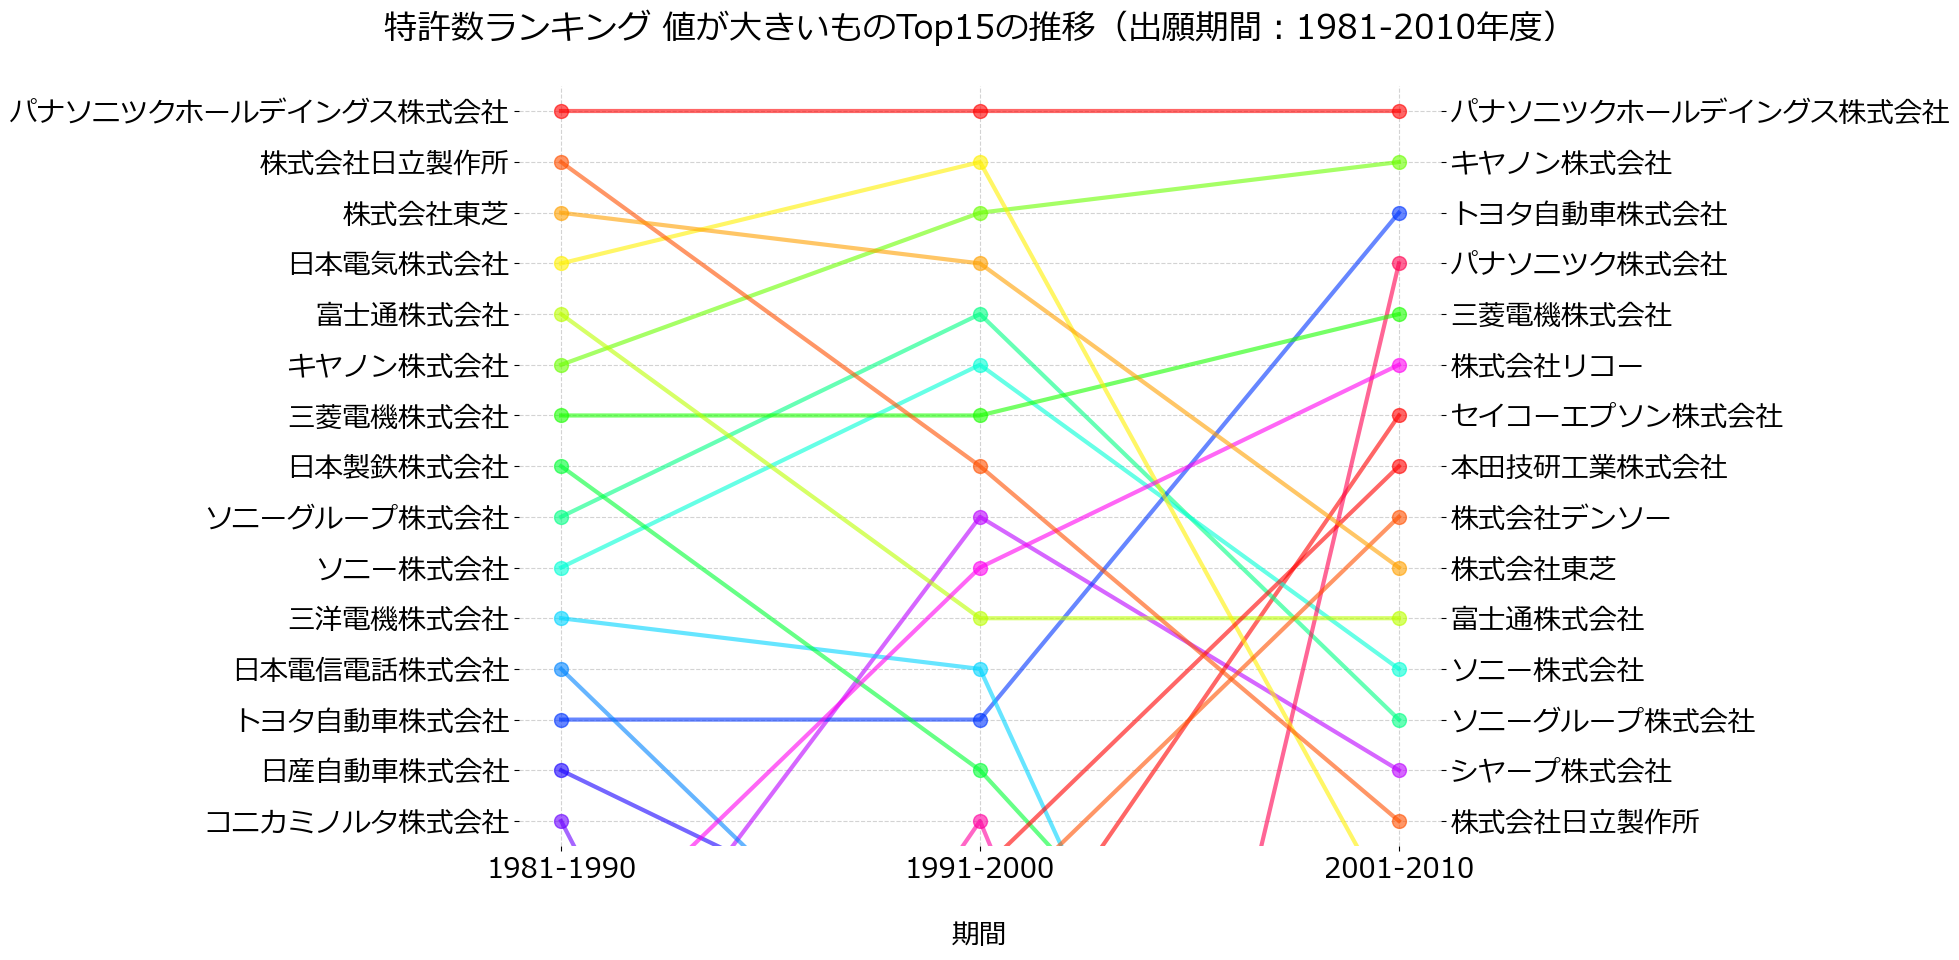

segment   right_person_name  diversity
108653     1981           三菱重工業株式会社        197
363593     1981     独立行政法人産業技術総合研究所        154
164497     1981           川崎重工業株式会社        153
344169     1981             株式会社ＩＨＩ        145
69198      1981  パナソニツクホールデイングス株式会社        143
327780     1981           株式会社日立製作所        138
217913     1981            日立造船株式会社        135
332029     1981              株式会社東芝        128
110474     1981            三菱電機株式会社        122
299251     1981   株式会社三井Ｅ＆Ｓホールデイングス        121
336278     1981           株式会社神戸製鋼所        121
227018     1981             旭化成株式会社        119
123828     1981         住友重機械工業株式会社        114
400013     1981     ＪＦＥエンジニアリング株式会社        114
103797     1981          三菱ケミカル株式会社        112

segment   right_person_name  diversity
583934      1991           三菱重工業株式会社        191
666486      1991           川崎重工業株式会社        179
933566      1991             株式会社ＩＨＩ        157
520806      1991  パナソニツクホールデイングス株式会社        143
903823      1991           株式会社日立製作所        137
631280      1991   国立研究開発法人産業技術総合研究所        134
588183      1991            三菱電機株式会社        124
751466      1991          本田技研工業株式会社        124
1011869     1991     ＪＦＥエンジニアリング株式会社        122
909893      1991              株式会社東芝        121
960881      1991     独立行政法人産業技術総合研究所        114
577257      1991          三菱ケミカル株式会社        111
916570      1991           株式会社神戸製鋼所        109
644634      1991            大阪瓦斯株式会社        108
704120      1991            日本碍子株式会社        107

segment   right_person_name  diversity
1214537     2001           三菱重工業株式会社        179
1295800     2001   国立研究開発法人産業技術総合研究所        149
1223091     2001            中国電力株式会社        142
1147938     2001  パナソニツクホールデイングス株式会社        141
1611687     2001             株式会社ＩＨＩ        141
1338570     2001           川崎重工業株式会社        139
1148549     2001          パナソニツク株式会社        136
1597634     2001           株式会社神戸製鋼所        122
1585414     2001           株式会社日立製作所        116
1279914     2001        国立大学法人東京工業大学        114
1219425     2001            三菱電機株式会社        113
1413723     2001          本田技研工業株式会社        113
1590302     2001              株式会社東芝        112
1279303     2001          国立大学法人東京大学        110
1603133     2001         株式会社豊田中央研究所        110

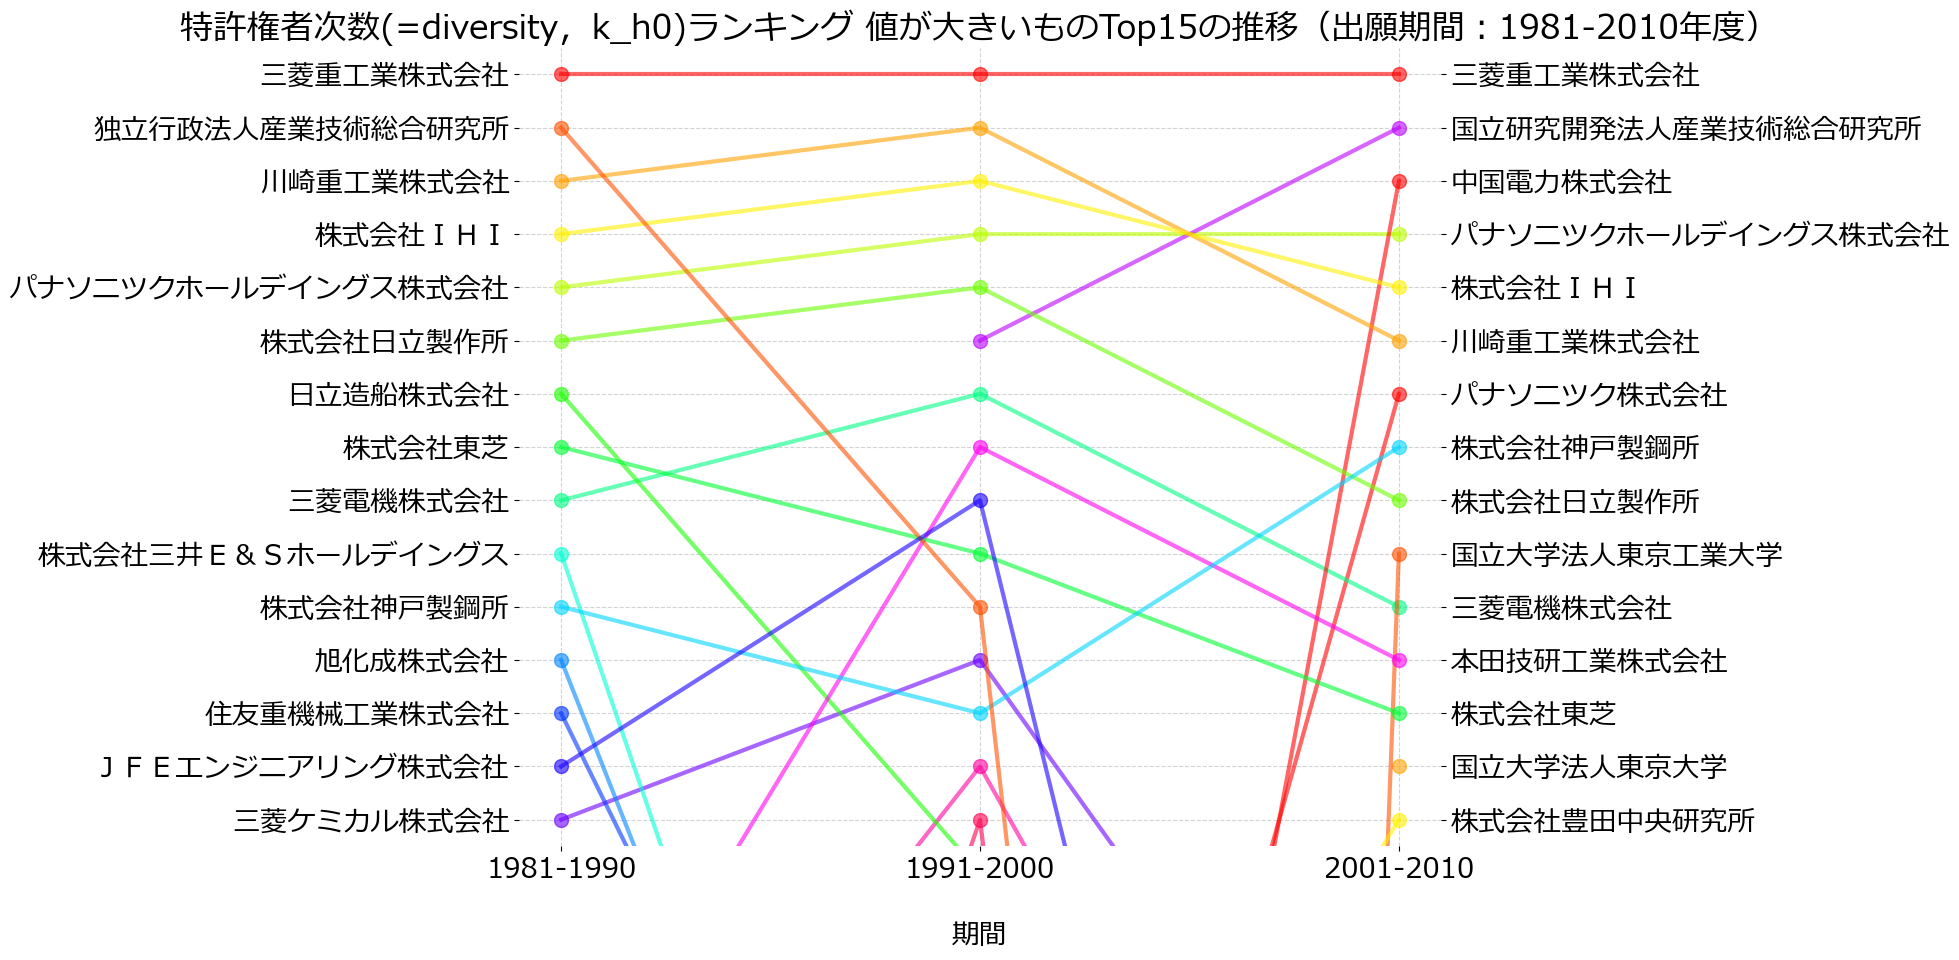

segment   right_person_name  ipc_class_num
69198      1981  パナソニツクホールデイングス株式会社            398
327780     1981           株式会社日立製作所            389
332029     1981              株式会社東芝            355
110474     1981            三菱電機株式会社            343
108653     1981           三菱重工業株式会社            335
363593     1981     独立行政法人産業技術総合研究所            285
199703     1981            日本製鉄株式会社            264
103797     1981          三菱ケミカル株式会社            262
160248     1981             富士通株式会社            253
58272      1981          トヨタ自動車株式会社            250
160855     1981            富士電機株式会社            245
102583     1981            三洋電機株式会社            244
164497     1981           川崎重工業株式会社            244
203952     1981            日本電気株式会社            235
344169     1981             株式会社ＩＨＩ            229

segment   right_person_name  ipc_class_num
520806     1991  パナソニツクホールデイングス株式会社            395
903823     1991           株式会社日立製作所            354
909893     1991              株式会社東芝            343
583934     1991           三菱重工業株式会社            336
588183     1991            三菱電機株式会社            326
666486     1991           川崎重工業株式会社            289
574222     1991            三洋電機株式会社            285
505631     1991          トヨタ自動車株式会社            283
711404     1991            日本電気株式会社            282
707155     1991            日本製鉄株式会社            267
933566     1991             株式会社ＩＨＩ            255
751466     1991          本田技研工業株式会社            254
834625     1991            株式会社デンソー            248
577257     1991          三菱ケミカル株式会社            246
470425     1991            シヤープ株式会社            244

segment   right_person_name  ipc_class_num
1147938     2001  パナソニツクホールデイングス株式会社            364
1148549     2001          パナソニツク株式会社            332
1585414     2001           株式会社日立製作所            308
1134496     2001          トヨタ自動車株式会社            307
1219425     2001            三菱電機株式会社            306
1590302     2001              株式会社東芝            303
1214537     2001           三菱重工業株式会社            290
1295800     2001   国立研究開発法人産業技術総合研究所            290
1413723     2001          本田技研工業株式会社            290
1374619     2001            日本製鉄株式会社            260
1503540     2001            株式会社デンソー            247
1098447     2001            シヤープ株式会社            240
1223091     2001            中国電力株式会社            238
1611687     2001             株式会社ＩＨＩ            237
1328794     2001             富士通株式会社            231

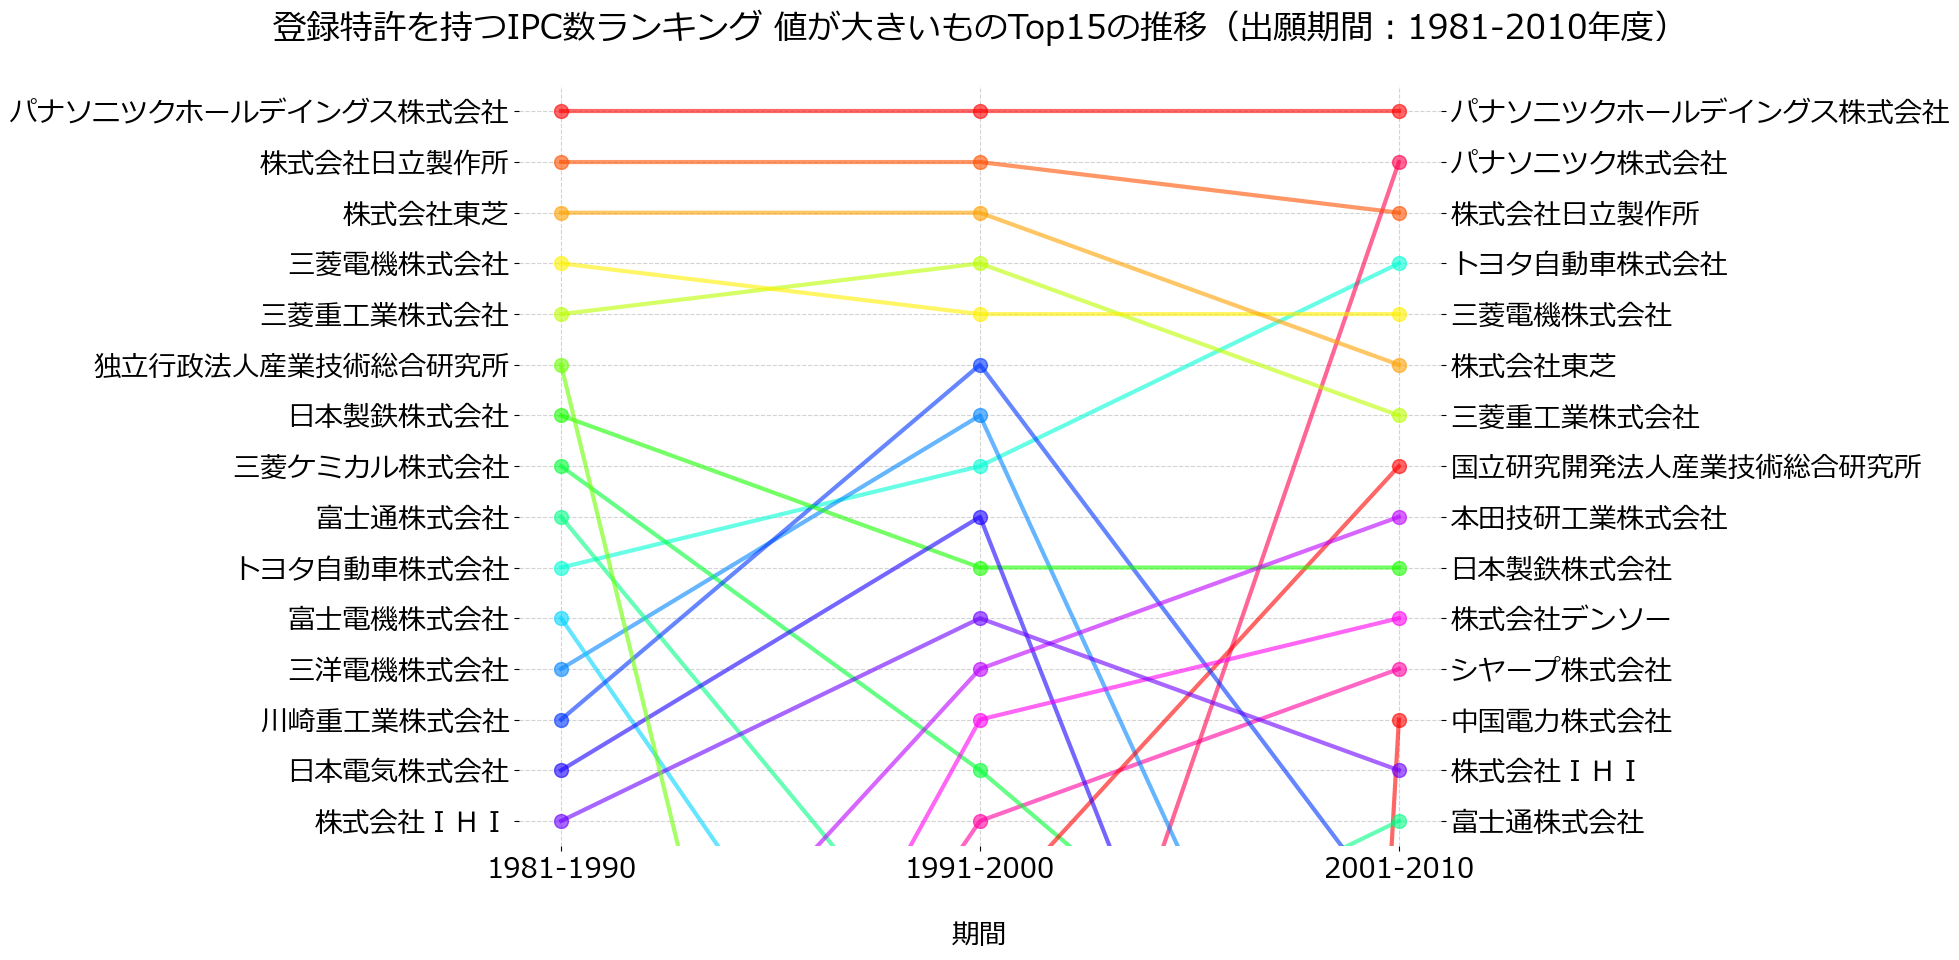

segment   right_person_name       eci
112295     1981      不二製油グループ本社株式会社  2.667270
112902     1981            不二製油株式会社  2.667270
18210      1981        キツセイ薬品工業株式会社  2.547685
386052     1981           長谷川香料株式会社  2.517552
146287     1981            大塚製薬株式会社  2.510159
152357     1981          大鵬薬品工業株式会社  2.420991
404869     1981  ＭｅｉｊｉＳｅｉｋａフアルマ株式会社  2.368481
120186     1981          住友フアーマ株式会社  2.305298
135968     1981           協和キリン株式会社  2.191902
351453     1981            森永乳業株式会社  2.190242
49167      1981       ダイスタージヤパン株式会社  2.159730
139610     1981             味の素株式会社  2.131789
210629     1981      日清オイリオグループ株式会社  2.112644
328994     1981              株式会社明治  2.098967
98334      1981              三共株式会社  2.055537

segment right_person_name       eci
572401     1991   三栄源エフ・エフ・アイ株式会社  2.496718
580899     1991  三菱商事ライフサイエンス株式会社  2.415022
721723     1991    日清オイリオグループ株式会社  2.403280
565724     1991       三井化学アグロ株式会社  2.298904
991838     1991         長谷川香料株式会社  2.263105
965737     1991        田辺三菱製薬株式会社  2.249264
638564     1991          大塚製薬株式会社  2.245509
590611     1991    不二製油グループ本社株式会社  2.241930
591218     1991          不二製油株式会社  2.241930
701085     1991          日本水産株式会社  2.239099
910500     1991            株式会社林原  2.205856
593039     1991          中外製薬株式会社  2.173207
645848     1991          太陽化学株式会社  2.168473
999122     1991        高砂香料工業株式会社  2.145972
842516     1991          株式会社ノエビア  2.142349

segment right_person_name       eci
1221869     2001    不二製油グループ本社株式会社  1.804298
1222480     2001          不二製油株式会社  1.804298
1209038     2001  三菱商事ライフサイエンス株式会社  1.735946
1640404     2001        理研ビタミン株式会社  1.720022
1672176     2001        高砂香料工業株式会社  1.716098
1666677     2001         長谷川香料株式会社  1.700211
1312908     2001          太陽化学株式会社  1.695149
1515149     2001          株式会社ノエビア  1.684830
1199873     2001   三栄源エフ・エフ・アイ株式会社  1.678416
1669121     2001       雪印メグミルク株式会社  1.654300
1524314     2001         株式会社フアンケル  1.650267
1642848     2001        田辺三菱製薬株式会社  1.593161
1227979     2001          丸善製薬株式会社  1.589824
1388672     2001    日清オイリオグループ株式会社  1.580776
1072785     2001        キツコーマン株式会社  1.505837

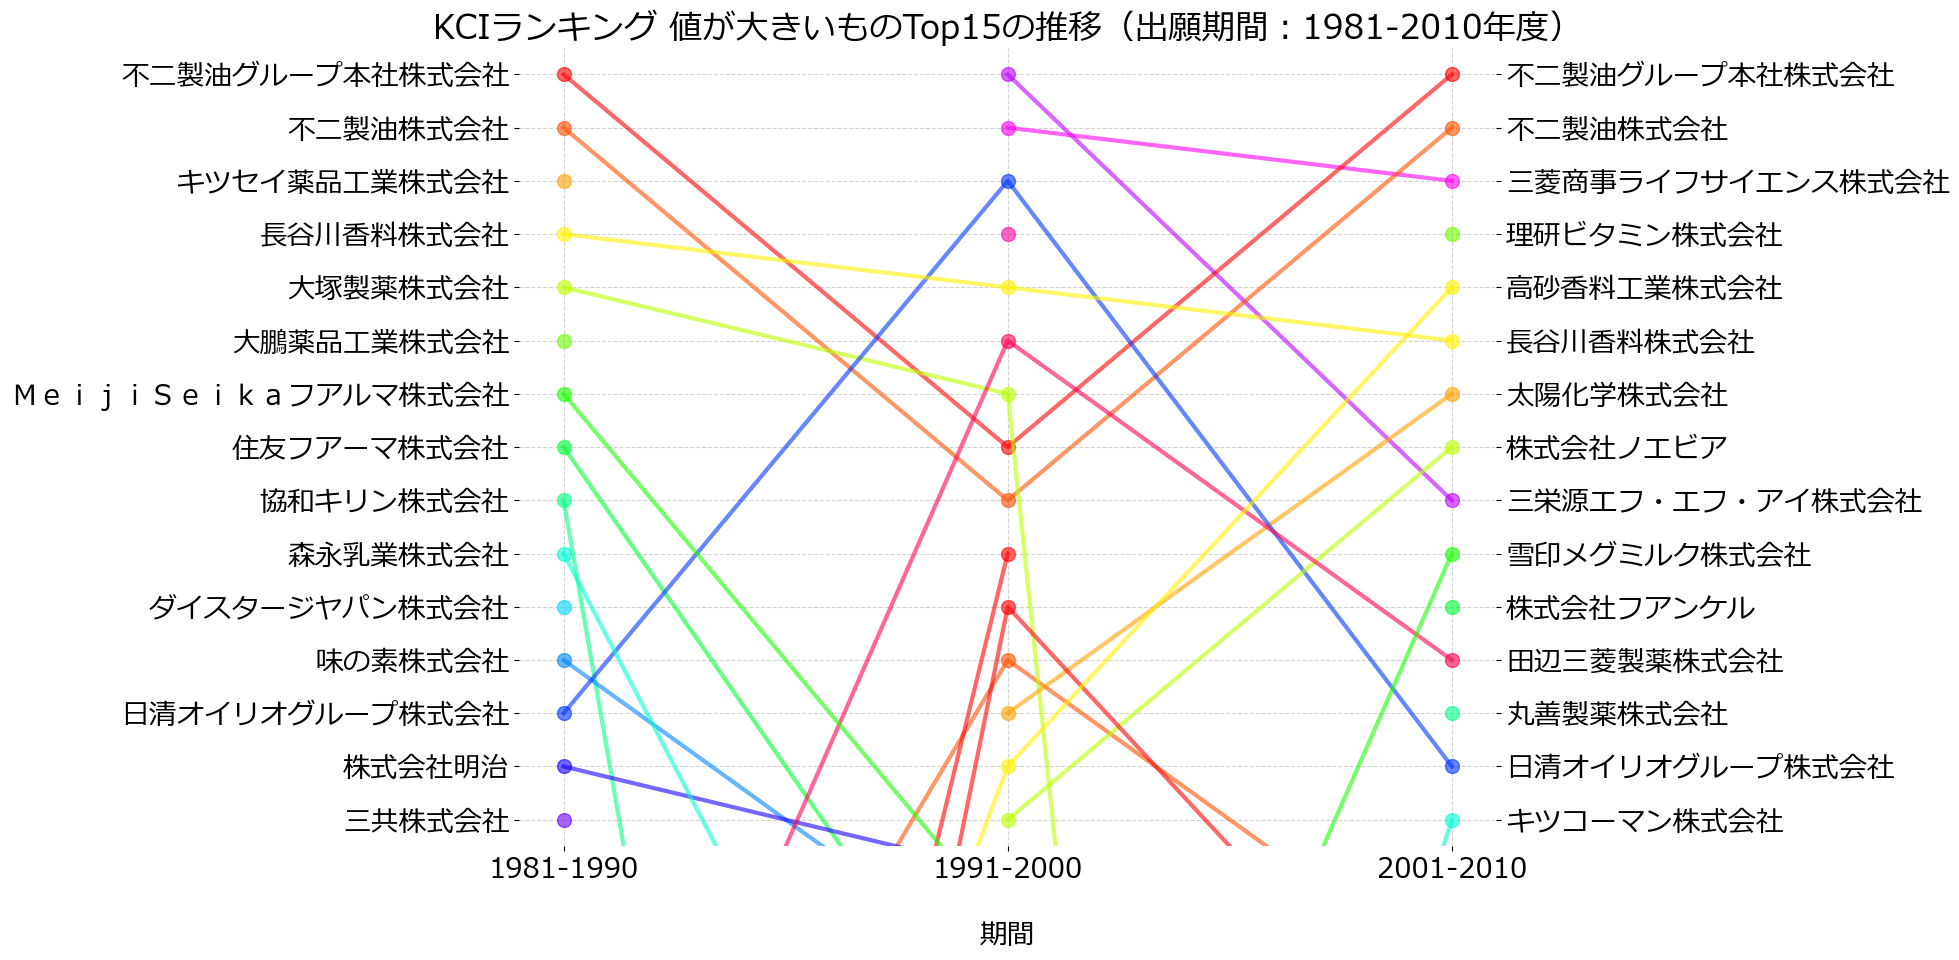

segment ipc_class  ubiquity
225     1981      B65G       219
490     1981      G01N       201
81      1981      B01J       183
92      1981      B05D       175
155     1981      B32B       175
148     1981      B29C       174
79      1981      B01D       172
223     1981      B65D       165
278     1981      C09K       162
489     1981      G01M       162
480     1981      G01B       161
65      1981      A61L       157
80      1981      B01F       157
91      1981      B05C       156
131     1981      B26D       151

segment ipc_class  ubiquity
413591     1991      B65G       252
413857     1991      G01N       251
413847     1991      G01B       240
413447     1991      B01D       238
413449     1991      B01J       237
413464     1991      B08B       232
413431     1991      A61L       215
413782     1991      F16B       211
413515     1991      B29C       207
413645     1991      C09K       207
413610     1991      C02F       204
413790     1991      F16L       198
413856     1991      G01M       198
413460     1991      B05D       197
413589     1991      B65D       197

segment ipc_class  ubiquity
1040281     2001      G01N       292
1040271     2001      G01B       271
1040068     2001      C09K       263
1039873     2001      B01J       253
1040029     2001      C01B       253
1039871     2001      B01D       249
1040014     2001      B65G       242
1040034     2001      C02F       229
1040207     2001      F16B       229
1040280     2001      G01M       226
1040058     2001      C08J       225
1039940     2001      B29C       217
1039795     2001      A01G       209
1040102     2001      C23C       200
1039872     2001      B01F       198

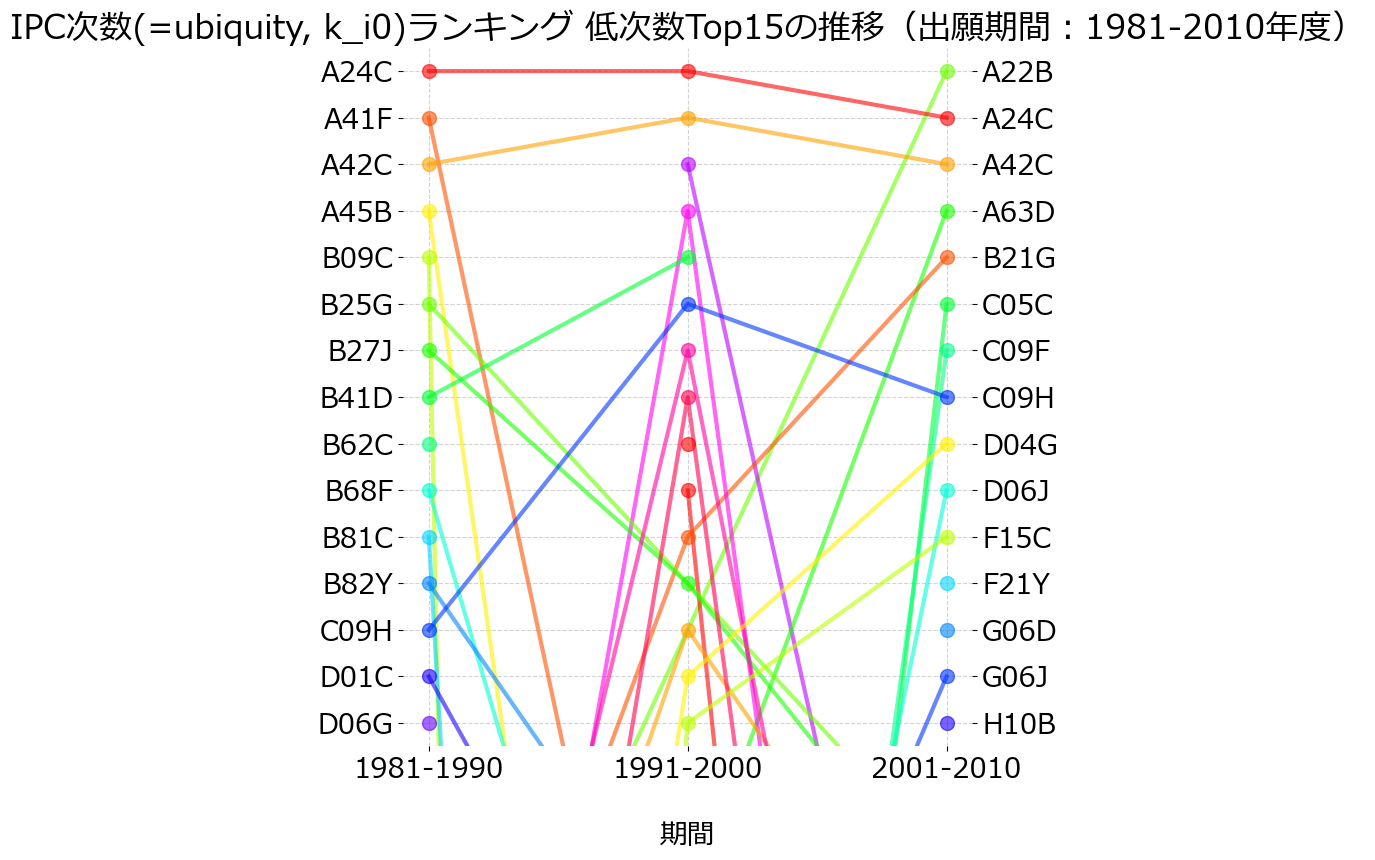

segment ipc_class  ubiquity
225     1981      B65G       219
490     1981      G01N       201
81      1981      B01J       183
92      1981      B05D       175
155     1981      B32B       175
148     1981      B29C       174
79      1981      B01D       172
223     1981      B65D       165
278     1981      C09K       162
489     1981      G01M       162
480     1981      G01B       161
65      1981      A61L       157
80      1981      B01F       157
91      1981      B05C       156
131     1981      B26D       151

segment ipc_class  ubiquity
413591     1991      B65G       252
413857     1991      G01N       251
413847     1991      G01B       240
413447     1991      B01D       238
413449     1991      B01J       237
413464     1991      B08B       232
413431     1991      A61L       215
413782     1991      F16B       211
413515     1991      B29C       207
413645     1991      C09K       207
413610     1991      C02F       204
413790     1991      F16L       198
413856     1991      G01M       198
413460     1991      B05D       197
413589     1991      B65D       197

segment ipc_class  ubiquity
1040281     2001      G01N       292
1040271     2001      G01B       271
1040068     2001      C09K       263
1039873     2001      B01J       253
1040029     2001      C01B       253
1039871     2001      B01D       249
1040014     2001      B65G       242
1040034     2001      C02F       229
1040207     2001      F16B       229
1040280     2001      G01M       226
1040058     2001      C08J       225
1039940     2001      B29C       217
1039795     2001      A01G       209
1040102     2001      C23C       200
1039872     2001      B01F       198

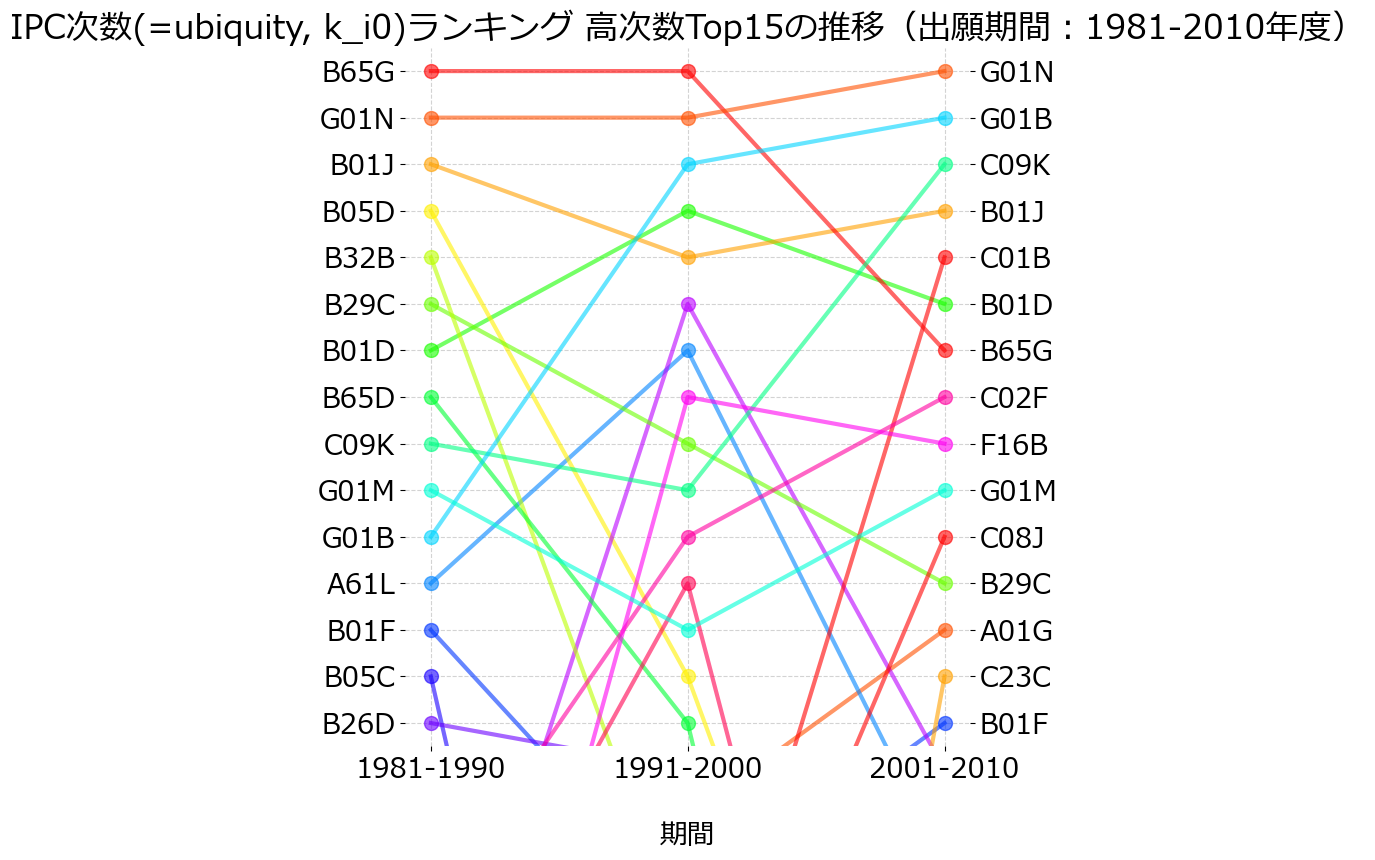

segment ipc_class       pci
287     1981      C11C  4.061342
17      1981      A23D  3.615198
12      1981      A21D  3.440045
16      1981      A23C  3.362918
261     1981      C07J  3.210655
302     1981      C13J  3.198058
259     1981      C07G  3.140264
20      1981      A23J  3.065473
262     1981      C07K  2.977804
19      1981      A23G  2.947810
303     1981      C13K  2.931871
18      1981      A23F  2.917479
286     1981      C11B  2.909127
293     1981      C12J  2.890881
260     1981      C07H  2.856417

segment ipc_class       pci
413434     1991      A61P  3.795766
413668     1991      C13F  3.587588
413383     1991      A23D  3.431730
413653     1991      C11B  3.417575
413382     1991      A23C  3.356918
413379     1991      A21D  3.327963
413386     1991      A23J  3.241973
413391     1991      A24B  3.218420
413654     1991      C11C  3.155809
413435     1991      A61Q  3.129067
413628     1991      C07J  3.000525
413627     1991      C07H  2.944223
413387     1991      A23K  2.940703
413390     1991      A23P  2.911643
413430     1991      A61K  2.815724

segment ipc_class       pci
1039808     2001      A23D  2.842614
1040064     2001      C09F  2.840022
1040135     2001      D06J  2.728740
1039811     2001      A23J  2.657324
1039807     2001      A23C  2.465355
1039803     2001      A21D  2.370055
1039860     2001      A61Q  2.322653
1039809     2001      A23F  2.315098
1040091     2001      C13D  2.280429
1040077     2001      C11B  2.215296
1040078     2001      C11C  2.156166
1039810     2001      A23G  2.144953
1040092     2001      C13F  2.130379
1040051     2001      C07J  2.126379
1040079     2001      C11D  1.994854

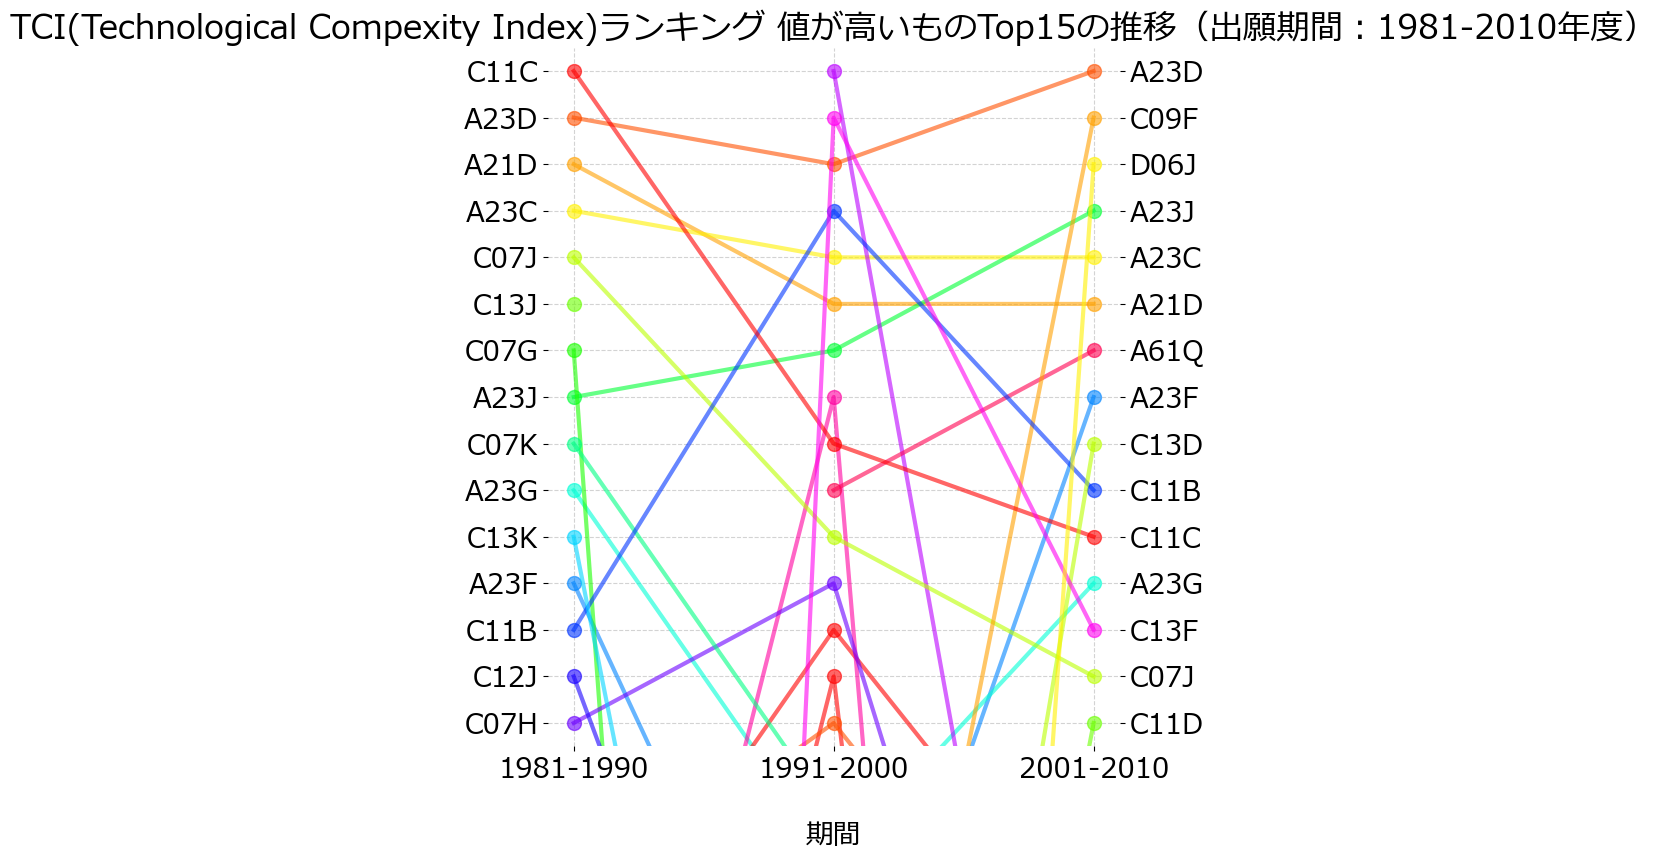

In [20]:

c_df_dict = {}
combi_dict = {
              # 1: ['right_person_name', 'diversity', f'特許権者次数(=diversity，k_h0)ランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              1: ['right_person_name', 'reg_num_sum', f'特許数ランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）\n', False], 
              2: ['right_person_name', 'diversity', f'特許権者次数(=diversity，k_h0)ランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
            #   3: ['right_person_name', 'eci', f'KCIランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              3: ['right_person_name', 'ipc_class_num', f'登録特許を持つIPC数ランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）\n', False], 
              4: ['right_person_name', 'eci', f'KCIランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              5: ['ipc_class', 'ubiquity', f'IPC次数(=ubiquity, k_i0)ランキング 低次数Top15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              6: ['ipc_class', 'ubiquity', f'IPC次数(=ubiquity, k_i0)ランキング 高次数Top15の推移（出願期間：{year_start}-{year_end}年度）', False], 
            #   7: ['ipc_class', 'pci', f'TCI(Technological Compexity Index)ランキング 値が低いものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              8: ['ipc_class', 'pci', f'TCI(Technological Compexity Index)ランキング 値が高いものTop15の推移（出願期間：{year_start}-{year_end}年度）', False]
              }


for p, sep_year_top_p_df in sep_year_top_p_df_dict.items():
    trade_cols = {'time':'segment', 'loc':'right_person_name', 'prod':'ipc_class', 'val':'reg_num'}
    display(sep_year_top_p_df.head())
    c_df = ecomplexity(sep_year_top_p_df, trade_cols, rca_mcp_threshold=1)
    hp_df = c_df[c_df['reg_num']>0].groupby(['segment', 'right_person_name'])[['ipc_class']].nunique().reset_index(drop=False)\
                                .rename(columns={'ipc_class':'ipc_class_num'})
    reg_num_df = sep_year_top_p_df.groupby(['segment', 'right_person_name'])[['reg_num']].sum().reset_index(drop=False)\
                                .rename(columns={'reg_num':'reg_num_sum'})
    # display(hp_df)
    # c_df_dict.append(c_df)
    # display(c_df.head())
    
    c_df = pd.merge(c_df, hp_df, on=['segment', 'right_person_name'], how='left')
    c_df = pd.merge(c_df, reg_num_df, on=['segment', 'right_person_name'], how='left')
    print(f'==============特許数上位{p}%==============')
    print('特許権者数', c_df['right_person_name'].nunique())
    print('IPCクラス数', c_df['ipc_class'].nunique())
    for i, combi in combi_dict.items():
        div_df = c_df[['segment']+combi[:2]].sort_values(by=['segment', combi[1]], ascending=[True, False]).copy()
        div_df = div_df.drop_duplicates(keep='first')
        div_df_dict = {}
        for year in range(year_start, year_end+1, year_range):
            div_df_dict[f'{year}-{year+year_range-1}'] = div_df[div_df['segment']==year].copy()
            display(div_df_dict[f'{year}-{year+year_range-1}'].head(15))
        if i > 4: fs = (8, 9)
        else: fs = (20, 10)
        # display(div_df)
        sample = vr.rank_doubleaxis(div_df_dict, 
                    version='kci', 
                        rank_num=15,
                        member_col=combi[0], 
                        num_col=combi[1],
                        prop_dict={
                            'figsize': fs,
                            'xlabel': '期間',
                            'ylabel': '',
                            'title': combi[2],
                            'fontsize': 20, 
                            'year_range': year_range, 
                            'ascending': combi[3]
                        })
        # plt.savefig(f'../Fig/Rank/p{p}/{combi[2]}{year_range}年ごと.png')
        plt.show()
    

In [26]:
# c_df.to_csv(f'../Data/3_ExModule/app_{year_start}_{year_end}.csv', 
#             encoding='utf-8', sep=',', index=False)

In [27]:
c_df['diversity'].max()

197

In [28]:
sep_year_kc1_df_dict = {}
for segment in c_df['segment'].unique():
    sep_year_kc1_df = c_df[c_df['segment']==segment].copy()
    sep_year_kc1_df['kc_1'] = sep_year_kc1_df['ubiquity'] * sep_year_kc1_df['mcp']
    sep_year_div_df = sep_year_kc1_df[['right_person_name', 'diversity']].groupby(['right_person_name'])[['diversity']].max().reset_index(drop=False).copy()
    sep_year_kc1_df = sep_year_kc1_df[['right_person_name', 'kc_1']].groupby(['right_person_name'])[['kc_1']].sum().reset_index(drop=False).copy()
    sep_year_kc1_df = pd.merge(sep_year_kc1_df, sep_year_div_df, on='right_person_name', how='left')
    sep_year_kc1_df['kc_1'] = sep_year_kc1_df['kc_1'] / sep_year_kc1_df['diversity']
    sep_year_kc1_df_dict[segment] = sep_year_kc1_df.copy()
    # display(sep_year_kc1_df.sort_values(by='kc_1', ascending=False).head(10))
    

1981
1991
2001


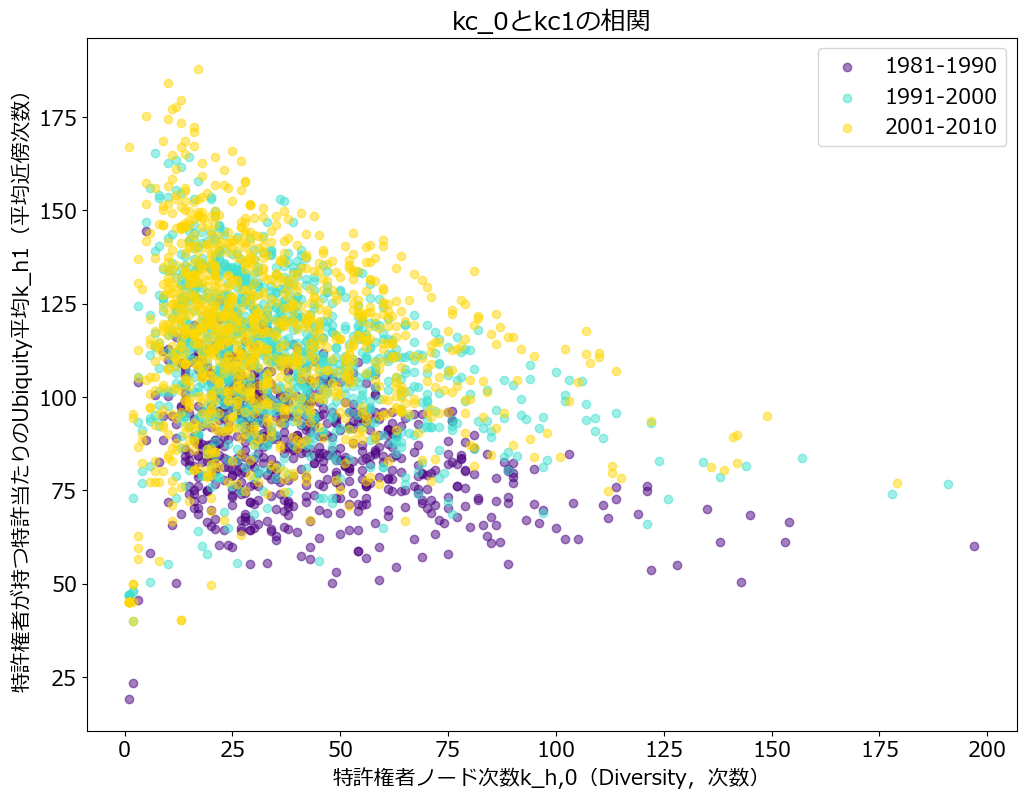

In [29]:
color_list = [
            'red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown',
            'grey', 'violet', 'indigo', 'turquoise', 'gold', 'lime', 'coral',
            'navy', 'skyblue', 'tomato', 'olive', 'cyan', 'darkred', 'darkgreen',
            'darkblue', 'darkorange', 'darkviolet', 'deeppink', 'firebrick', 'darkcyan',
            'darkturquoise', 'darkslategray', 'darkgoldenrod', 'mediumblue', 'mediumseagreen',
            'mediumpurple', 'mediumvioletred', 'midnightblue', 'saddlebrown', 'seagreen',
            'sienna', 'steelblue'
            ][10:]
fig, ax = plt.subplots(figsize=(12, 9))
color_count = 0
for k, v in sep_year_kc1_df_dict.items():
    print(k)
    ax.scatter(v['diversity'], v['kc_1'], alpha=0.5, 
               label=f'{k}-{k+year_range-1}', color=color_list[color_count])
    ax.set_title('kc_0とkc1の相関')
    ax.set_xlabel('特許権者ノード次数k_h,0（Diversity，次数）')
    ax.set_ylabel('特許権者が持つ特許当たりのUbiquity平均k_h1（平均近傍次数）')
    color_count += 1
plt.legend()



In [30]:
color_list = [
            'red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown',
            'grey', 'violet', 'indigo', 'turquoise', 'gold', 'lime', 'coral',
            'navy', 'skyblue', 'tomato', 'olive', 'cyan', 'darkred', 'darkgreen',
            'darkblue', 'darkorange', 'darkviolet', 'deeppink', 'firebrick', 'darkcyan',
            'darkturquoise', 'darkslategray', 'darkgoldenrod', 'mediumblue', 'mediumseagreen',
            'mediumpurple', 'mediumvioletred', 'midnightblue', 'saddlebrown', 'seagreen',
            'sienna', 'steelblue'
            ][10:]
# fig, ax = plt.subplots(figsize=(12, 9))
color_count = 0
reg_num_df = c_df.groupby(['segment', 'right_person_name'])[['reg_num']].sum().reset_index(drop=False).copy()
kci_df = c_df.groupby(['segment', 'right_person_name'])[['eci']].max().reset_index(drop=False).copy()
for k, v in sep_year_kc1_df_dict.items():
    sep_year_kc1_df_dict[k]['segment'] = k
sep_year_kc1_df = pd.concat(list(sep_year_kc1_df_dict.values()), axis='index')
various_df = c_df[c_df['reg_num'] > 0].groupby(['segment', 'right_person_name'])[['ipc_class']].nunique().reset_index(drop=False).copy()
various_after_df = c_df[c_df['mcp'] == 1].groupby(['segment', 'right_person_name'])[['ipc_class']].nunique().reset_index(drop=False).copy()
various_after_df = various_after_df.rename(columns={'ipc_class':'ipc_class_after'})
# kci_df


In [31]:
all_info_df = pd.merge(reg_num_df, kci_df, on=['segment', 'right_person_name'], how='inner')
all_info_df = pd.merge(all_info_df, sep_year_kc1_df, on=['segment', 'right_person_name'], how='inner')
all_info_df = pd.merge(all_info_df, various_df, on=['segment', 'right_person_name'], how='inner')
all_info_df = pd.merge(all_info_df, various_after_df, on=['segment', 'right_person_name'], how='inner')
all_info_df['reg_num_rank'] = all_info_df.groupby(['segment'])['reg_num'].rank(ascending=False, method='first')
all_info_df['diversity_rank'] = all_info_df.groupby(['segment'])['diversity'].rank(ascending=False, method='first')
all_info_df['eci_rank'] = all_info_df.groupby(['segment'])['eci'].rank(ascending=False, method='first')
all_info_df

segment right_person_name  reg_num       eci        kc_1  diversity  \
0        1981        いすゞ自動車株式会社   1466.0 -0.409268   69.070423         71   
1        1981          ぺんてる株式会社    590.0  0.362426   95.325581         43   
2        1981        アイシン化工株式会社    156.0  0.684015  112.125000         24   
3        1981        アイジー工業株式会社    707.0  0.339500  110.291667         24   
4        1981   アイダエンジニアリング株式会社    270.0 -0.559234  100.848485         33   
...       ...               ...      ...       ...         ...        ...   
2821     2001           ＵＢＥ株式会社   1433.0  0.787791  116.031746         63   
2822     2001       ＵＤトラツクス株式会社    810.0 -0.234541   94.966102         59   
2823     2001           ＹＫＫ株式会社    384.0  0.468774   88.870968         31   
2824     2001         ＹＫＫＡＰ株式会社    741.0  0.223271  121.210526         19   
2825     2001     Ｚホールデイングス株式会社    920.0 -1.299125  116.928571         14   

      ipc_class  ipc_class_after  reg_num_rank  diversity_rank  eci_rank  
0           116               71          99.0            80.0     458.0  
1            61               43         231.0           271.0     205.0  
2            27               24         627.0           525.0     154.0  
3            34               24         197.0           526.0     209.0  
4            39               33         403.0           380.0     504.0  
...         ...              ...           ...             ...       ...  
2821         97               63         158.0           122.0     175.0  
2822         85               59         262.0           152.0     794.0  
2823         44               31         505.0           487.0     330.0  
2824         34               19         288.0           800.0     505.0  
2825         25               14         235.0           944.0    1036.0  

[2826 rows x 11 columns]

In [32]:
all_info_df['segment'].unique()

array([1981, 1991, 2001], dtype=int64)

1981 -0.141
1991 -0.139
2001 -0.104


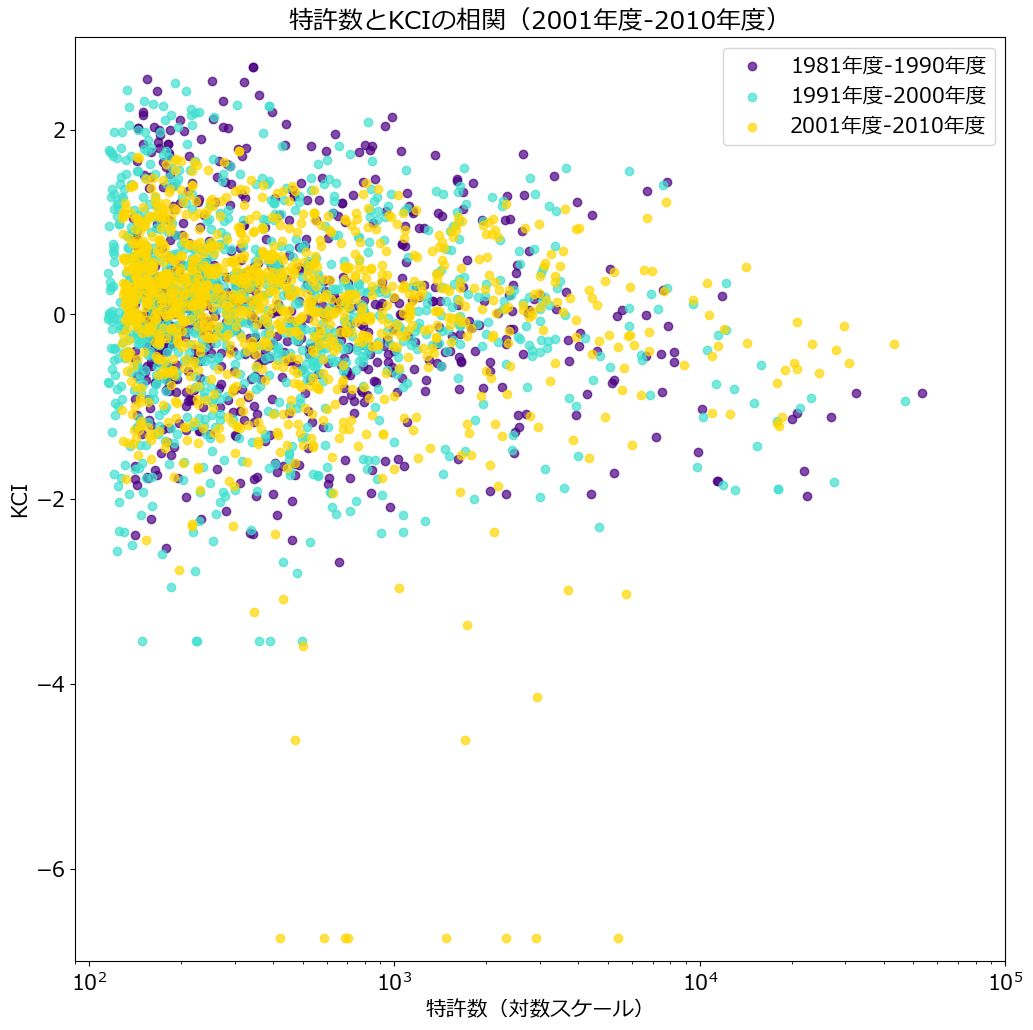

In [33]:
fig, ax = plt.subplots(figsize=(12, 12))
color_count = 0
for s in all_info_df['segment'].unique():
#     fig, ax = plt.subplots(figsize=(12, 12))
    ax.scatter(all_info_df[all_info_df['segment']==s]['reg_num'], 
               all_info_df[all_info_df['segment']==s]['eci'], 
               alpha=0.7, label=f'{s}年度-{s+year_range-1}年度', color=color_list[color_count])
    ax.set_title(f'特許数とKCIの相関（{s}年度-{s+year_range-1}年度）')
    ax.set_xscale('log')
    ax.set_ylabel('KCI')
    ax.set_xlabel('特許数（対数スケール）')
    ax.legend()
    ax.set_xlim(90, 10**5)
    ax.set_ylim(-7, 3)
    color_count += 1
    corr_num = round(all_info_df[all_info_df['segment']==s]['reg_num'].corr(all_info_df[all_info_df['segment']==s]['eci']), 3)
    print(s, corr_num)
# ax.scatter(all_info_df['reg_num'], all_info_df['eci'])

In [34]:
# for s in c_df['segment'].unique():
    # display(c_df[(c_df['segment']==s)&(c_df['reg_num']!=0)].sort_values(by=['eci', 'ubiquity', 'reg_num'], ascending=[False, True, False]).head(20))
    # display(c_df[(c_df['segment']==s)&(c_df['reg_num']!=0)&(c_df['ipc_class']=='A23J')].drop('reg_num', axis=1).sort_values(by=['diversity', 'eci'], ascending=[False, False]).head(20))

In [35]:
for s in all_info_df['segment'].unique():
    print(s)
    display(all_info_df[all_info_df['segment']==s].sort_values(by=['eci_rank', 'kc_1'], ascending=[True, True]).head(10))

1981


segment   right_person_name  reg_num       eci        kc_1  diversity  \
185     1981      不二製油グループ本社株式会社    345.0  2.672684   74.842105         19   
186     1981            不二製油株式会社    345.0  2.672684   74.842105         19   
30      1981        キツセイ薬品工業株式会社    155.0  2.547337  112.444444          9   
636     1981           長谷川香料株式会社    252.0  2.521062   84.454545         22   
241     1981            大塚製薬株式会社    321.0  2.509107   91.900000         20   
251     1981          大鵬薬品工業株式会社    167.0  2.421712   95.846154         13   
667     1981  ＭｅｉｊｉＳｅｉｋａフアルマ株式会社    361.0  2.371527   64.966667         30   
198     1981          住友フアーマ株式会社    275.0  2.309192   90.818182         22   
224     1981           協和キリン株式会社    396.0  2.195032   82.437500         32   
579     1981            森永乳業株式会社    150.0  2.194491   97.347826         23   

     ipc_class  ipc_class_after  reg_num_rank  diversity_rank  eci_rank  
185         21               19         344.0           589.0       1.0  
186         21               19         345.0           590.0       2.0  
30           9                9         631.0           670.0       3.0  
636         24               22         421.0           562.0       4.0  
241         22               20         362.0           580.0       5.0  
251         14               13         580.0           657.0       6.0  
667         36               30         325.0           432.0       7.0  
198         25               22         400.0           553.0       8.0  
224         39               32         308.0           394.0       9.0  
579         25               23         647.0           548.0      10.0

1991


segment right_person_name  reg_num       eci        kc_1  diversity  \
943      1991   三栄源エフ・エフ・アイ株式会社    191.0  2.507241   97.894737         19   
957      1991  三菱商事ライフサイエンス株式会社    133.0  2.425403  106.120000         25   
1189     1991    日清オイリオグループ株式会社    207.0  2.414475   96.500000         28   
932      1991       三井化学アグロ株式会社    151.0  2.312630  133.700000         10   
1635     1991         長谷川香料株式会社    162.0  2.272215  112.000000         31   
1592     1991        田辺三菱製薬株式会社    306.0  2.262097  117.368421         19   
1052     1991          大塚製薬株式会社    175.0  2.258939  114.750000         16   
973      1991    不二製油グループ本社株式会社    389.0  2.251490   87.060606         33   
974      1991          不二製油株式会社    389.0  2.251490   87.060606         33   
1155     1991          日本水産株式会社    135.0  2.247784   94.250000         28   

      ipc_class  ipc_class_after  reg_num_rank  diversity_rank  eci_rank  
943          20               19         723.0           805.0       1.0  
957          25               25         943.0           658.0       2.0  
1189         32               28         687.0           593.0       3.0  
932          10               10         857.0           982.0       4.0  
1635         31               31         817.0           536.0       5.0  
1592         24               19         498.0           819.0       6.0  
1052         17               16         770.0           875.0       7.0  
973          37               33         422.0           490.0       8.0  
974          37               33         423.0           491.0       9.0  
1155         28               28         934.0           590.0      10.0

2001


segment right_person_name  reg_num       eci        kc_1  diversity  \
2011     2001    不二製油グループ本社株式会社    309.0  1.770423   94.760000         25   
2012     2001          不二製油株式会社    309.0  1.770423   94.760000         25   
1990     2001  三菱商事ライフサイエンス株式会社    143.0  1.703797   95.727273         22   
2696     2001        理研ビタミン株式会社    146.0  1.690561  111.950000         20   
2748     2001        高砂香料工業株式会社    192.0  1.684413  125.588235         17   
2739     2001         長谷川香料株式会社    191.0  1.669011  117.571429         21   
2159     2001          太陽化学株式会社    200.0  1.664446  118.266667         30   
2491     2001          株式会社ノエビア    221.0  1.653901  105.285714          7   
1975     2001   三栄源エフ・エフ・アイ株式会社    277.0  1.646521  101.520000         25   
2743     2001       雪印メグミルク株式会社    178.0  1.622914   93.157895         19   

      ipc_class  ipc_class_after  reg_num_rank  diversity_rank  eci_rank  
2011         27               25         594.0           617.0       1.0  
2012         27               25         595.0           618.0       2.0  
1990         22               22        1027.0           690.0       3.0  
2696         21               20        1012.0           767.0       4.0  
2748         19               17         820.0           853.0       5.0  
2739         24               21         823.0           737.0       6.0  
2159         33               30         795.0           497.0       7.0  
2491          8                7         744.0          1069.0       8.0  
1975         31               25         641.0           614.0       9.0  
2743         22               19         868.0           796.0      10.0

In [36]:
all_info_df

segment right_person_name  reg_num       eci        kc_1  diversity  \
0        1981        いすゞ自動車株式会社   1466.0 -0.409268   69.070423         71   
1        1981          ぺんてる株式会社    590.0  0.362426   95.325581         43   
2        1981        アイシン化工株式会社    156.0  0.684015  112.125000         24   
3        1981        アイジー工業株式会社    707.0  0.339500  110.291667         24   
4        1981   アイダエンジニアリング株式会社    270.0 -0.559234  100.848485         33   
...       ...               ...      ...       ...         ...        ...   
2821     2001           ＵＢＥ株式会社   1433.0  0.787791  116.031746         63   
2822     2001       ＵＤトラツクス株式会社    810.0 -0.234541   94.966102         59   
2823     2001           ＹＫＫ株式会社    384.0  0.468774   88.870968         31   
2824     2001         ＹＫＫＡＰ株式会社    741.0  0.223271  121.210526         19   
2825     2001     Ｚホールデイングス株式会社    920.0 -1.299125  116.928571         14   

      ipc_class  ipc_class_after  reg_num_rank  diversity_rank  eci_rank  
0           116               71          99.0            80.0     458.0  
1            61               43         231.0           271.0     205.0  
2            27               24         627.0           525.0     154.0  
3            34               24         197.0           526.0     209.0  
4            39               33         403.0           380.0     504.0  
...         ...              ...           ...             ...       ...  
2821         97               63         158.0           122.0     175.0  
2822         85               59         262.0           152.0     794.0  
2823         44               31         505.0           487.0     330.0  
2824         34               19         288.0           800.0     505.0  
2825         25               14         235.0           944.0    1036.0  

[2826 rows x 11 columns]

In [37]:
import matplotlib.ticker as ptick
import networkx as nx
import networkx.algorithms.bipartite as bip


In [38]:
c_df

right_person_name ipc_class  reg_num  segment  diversity  ubiquity  \
0              いすゞ自動車株式会社      A01B      0.0     1981         71        15   
1              いすゞ自動車株式会社      A01C      0.0     1981         71        21   
2              いすゞ自動車株式会社      A01D      0.0     1981         71        20   
3              いすゞ自動車株式会社      A01F      0.0     1981         71        25   
4              いすゞ自動車株式会社      A01G      0.0     1981         71       148   
...                   ...       ...      ...      ...        ...       ...   
1719829     Ｚホールデイングス株式会社      H05G      0.0     2001         14        30   
1719830     Ｚホールデイングス株式会社      H05H      0.0     2001         14        91   
1719831     Ｚホールデイングス株式会社      H05K      0.0     2001         14       180   
1719832     Ｚホールデイングス株式会社      H10B      0.0     2001         14         1   
1719833     Ｚホールデイングス株式会社      H10K      0.0     2001         14         1   

         mcp       eci       pci   density       coi       cog  rca  
0          0 -0.409268 -0.139177  0.229309 -0.590692  0.116874  0.0  
1          0 -0.409268  0.998249  0.164088 -0.590692  0.398322  0.0  
2          0 -0.409268 -0.133186  0.232075 -0.590692  0.017777  0.0  
3          0 -0.409268  0.789687  0.123220 -0.590692  0.355931  0.0  
4          0 -0.409268  1.098426  0.123289 -0.590692  0.793375  0.0  
...      ...       ...       ...       ...       ...       ...  ...  
1719829    0 -1.299125  0.127064  0.021097 -1.281586  0.050074  0.0  
1719830    0 -1.299125  0.209636  0.033319 -1.281586  0.049295  0.0  
1719831    0 -1.299125 -0.620678  0.047041 -1.281586 -0.242383  0.0  
1719832    0 -1.299125 -2.103911  0.002810 -1.281586 -2.038807  0.0  
1719833    0 -1.299125 -2.103911  0.002810 -1.281586 -2.038807  0.0  

[1719834 rows x 13 columns]

In [39]:
for s in all_info_df['segment'].unique():
    print(f'{s}-{s+9}年度の特許権者数：', all_info_df[all_info_df['segment']==s]['right_person_name'].nunique())
    print(f'{s}-{s+9}年度のIPC数：', all_info_df[all_info_df['segment']==s]['ipc_class'].nunique())
    print(f'{s}-{s+9}年度のエッジ数：', all_info_df[all_info_df['segment']==s]['diversity'].sum())
    print('**************************************')

1981-1990年度の特許権者数： 681
1981-1990年度のIPC数： 177
1981-1990年度のエッジ数： 28997
**************************************
1991-2000年度の特許権者数： 1032
1991-2000年度のIPC数： 192
1991-2000年度のエッジ数： 37825
**************************************
2001-2010年度の特許権者数： 1113
2001-2010年度のIPC数： 184
2001-2010年度のエッジ数： 37614
**************************************


In [49]:
mitsubishi_specialize = c_df[(c_df['right_person_name']=='三菱重工業株式会社')&(c_df['mcp']==1)]['ipc_class'].unique().tolist()

for f in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']:
    print(f'{f}：', len([m for m in mitsubishi_specialize if m[0]==f]))

A： 13
B： 88
C： 29
D： 8
E： 16
F： 77
G： 29
H： 6


In [48]:
mitsubishi = sorted(all_reg_num_df[all_reg_num_df['right_person_name']=='三菱重工業株式会社']['ipc_class'].unique().tolist())
for f in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']:
    print(f'{f}：', len([m for m in mitsubishi if m[0]==f]))

A： 34
B： 114
C： 50
D： 11
E： 25
F： 82
G： 54
H： 33


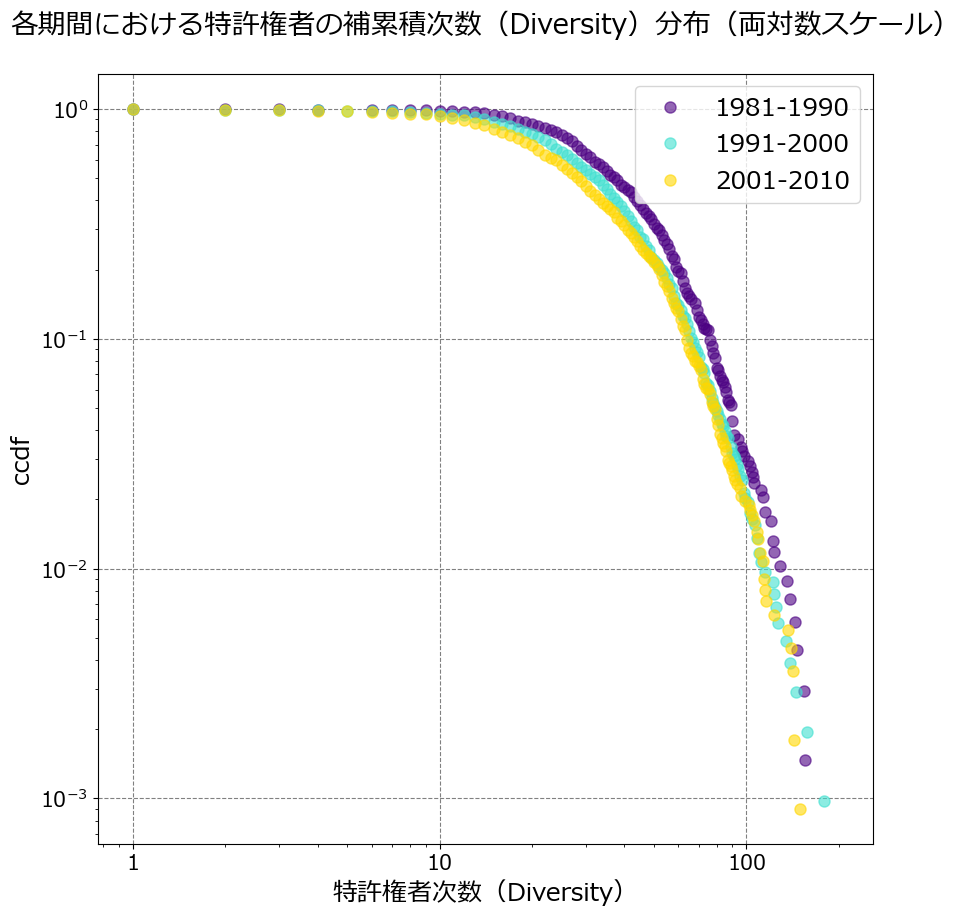

In [26]:
all_info_df
def ccdf(diversity_col: list):
        freq_array = np.array(np.bincount(diversity_col))
        p_list = []
        cumsum = 0.0
        s = float(freq_array.sum())
        for freq in freq_array:
            if freq != 0:
                cumsum += freq / s
                p_list.append(cumsum)
            else:
                p_list.append(1.0)
                
        ccdf_array = 1 - np.array(p_list)
        if ccdf_array[0] == 0:
            ccdf_array[0] = 1.0
        return ccdf_array

color_list = [
    'red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown',
    'grey', 'violet', 'indigo', 'turquoise', 'gold', 'lime', 'coral',
    'navy', 'skyblue', 'tomato', 'olive', 'cyan', 'darkred', 'darkgreen',
    'darkblue', 'darkorange', 'darkviolet', 'deeppink', 'firebrick', 'darkcyan',
    'darkturquoise', 'darkslategray', 'darkgoldenrod', 'mediumblue', 'mediumseagreen',
    'mediumpurple', 'mediumvioletred', 'midnightblue', 'saddlebrown', 'seagreen',
    'sienna', 'steelblue'
    ][10:]

color_count = 0
fig, ax = plt.subplots(figsize=(10, 10))
for s in all_info_df['segment'].unique():
    ccdf_array = ccdf(all_info_df[all_info_df['segment']==s]['diversity'].to_list())
    ax.plot(range(1, len(ccdf_array)+1), ccdf_array, 'o', markersize=8, 
                    color=color_list[color_count], label=f'{s}-{s+9}', alpha=0.6)
    color_count += 1
ax.legend(loc='upper right', fontsize=18)

ax.set_title('各期間における特許権者の補累積次数（Diversity）分布（両対数スケール）'+'\n', fontsize=20)
ax.set_xlabel('特許権者次数（Diversity）', fontsize=18)
ax.set_ylabel('ccdf', fontsize=18)

ax.set_xscale('log')
ax.set_yscale('log')

# x軸の指数表記を普通に戻す魔法
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))

# ax.set_xlim(prop_dict['xlim'])
# ax.set_ylim(prop_dict['ylim'])

ax.grid(axis='both', 
        which='major', 
        alpha=1, 
        linestyle='--', 
        linewidth=0.8, 
        color='gray')
    
plt.show()

1981 0.708
1991 0.732
2001 0.72


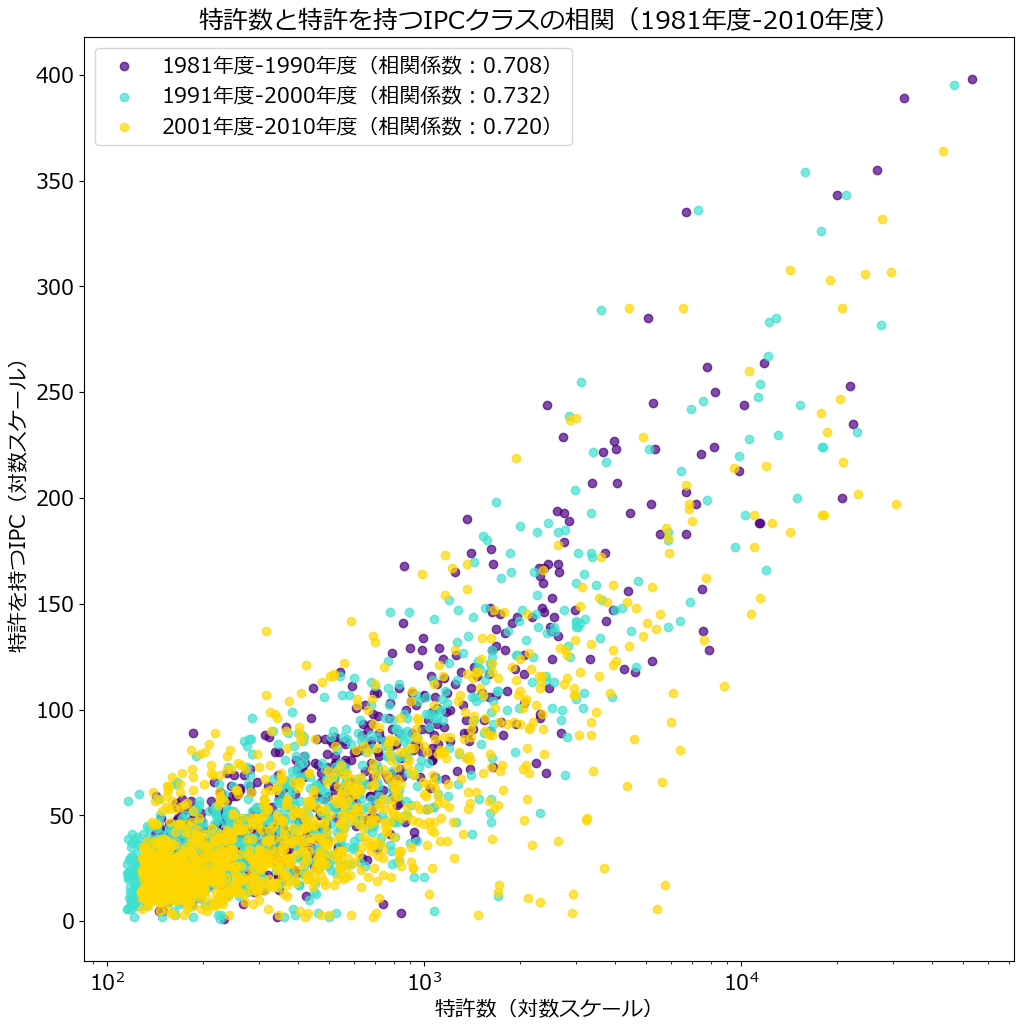

In [27]:
fig, ax = plt.subplots(figsize=(12, 12))
color_count = 0
for s in all_info_df['segment'].unique():
#     fig, ax = plt.subplots(figsize=(12, 12))
    corr_num = round(all_info_df[all_info_df['segment']==s]['reg_num'].corr(all_info_df[all_info_df['segment']==s]['ipc_class']), 3)
    print(s, corr_num)
    ax.scatter(all_info_df[all_info_df['segment']==s]['reg_num'], 
               all_info_df[all_info_df['segment']==s]['ipc_class'], 
               alpha=0.7, label=f'{s}年度-{s+year_range-1}年度（相関係数：'+'{:.3f}'.format(corr_num)+'）', color=color_list[color_count])
    ax.set_title(f'特許数と特許を持つIPCクラスの相関（1981年度-{s+year_range-1}年度）')
    ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.set_ylabel('特許を持つIPC（対数スケール）')
    ax.set_xlabel('特許数（対数スケール）')
    ax.legend()
    # ax.set_xlim(90, 10**5)
    # ax.set_ylim(-7, 3)
    color_count += 1
    
# ax.scatter(all_info_df['reg_num'], all_info_df['eci'])

1981 0.452
1991 0.446
2001 0.392


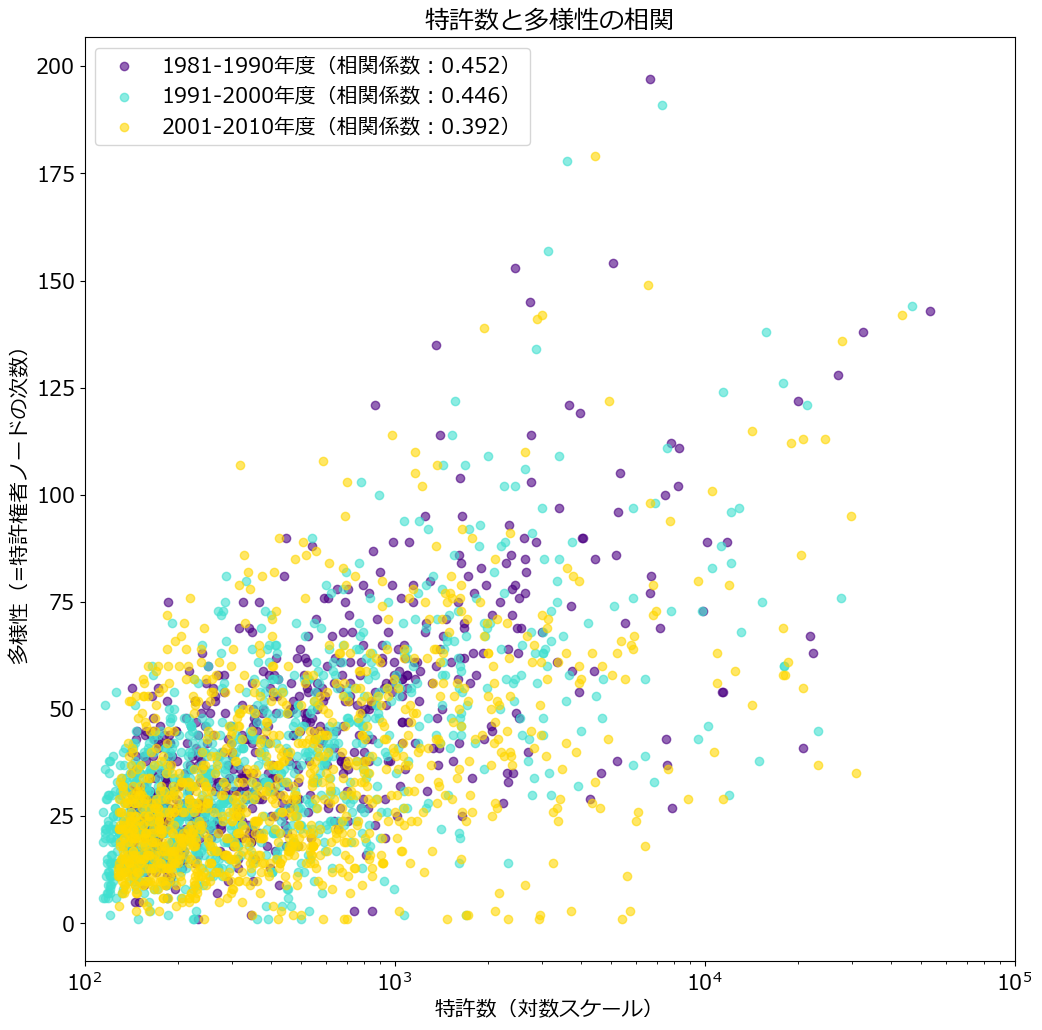

In [28]:
fig, ax = plt.subplots(figsize=(12, 12))
color_count = 0
for s in all_info_df['segment'].unique():
    corr_num = round(all_info_df[all_info_df['segment']==s]['reg_num'].corr(all_info_df[all_info_df['segment']==s]['diversity']), 3)
    print(s, corr_num)
    ax.scatter(all_info_df[all_info_df['segment']==s]['reg_num'], 
               all_info_df[all_info_df['segment']==s]['diversity'],
               alpha=0.6, label=f'{s}-{s+year_range-1}年度（相関係数：{corr_num}）', color=color_list[color_count])
    ax.set_title('特許数と多様性の相関')
    ax.set_xscale('log')
    # ax.set_yscale('log')
    
    ax.set_ylabel('多様性（=特許権者ノードの次数）')
    ax.set_xlabel('特許数（対数スケール）')
    ax.set_xlim(10**2, 10**5)
    ax.legend(loc='upper left')
    color_count += 1
    
# ax.scatter(all_info_df['reg_num'], all_info_df['eci'])

In [ ]:
all_info_df

segment right_person_name  reg_num       eci        kc_1  diversity  \
0        1981        いすゞ自動車株式会社   1466.0 -0.409268   69.070423         71   
1        1981          ぺんてる株式会社    590.0  0.362426   95.325581         43   
2        1981        アイシン化工株式会社    156.0  0.684015  112.125000         24   
3        1981        アイジー工業株式会社    707.0  0.339500  110.291667         24   
4        1981   アイダエンジニアリング株式会社    270.0 -0.559234  100.848485         33   
...       ...               ...      ...       ...         ...        ...   
2821     2001           ＵＢＥ株式会社   1433.0  0.787791  116.031746         63   
2822     2001       ＵＤトラツクス株式会社    810.0 -0.234541   94.966102         59   
2823     2001           ＹＫＫ株式会社    384.0  0.468774   88.870968         31   
2824     2001         ＹＫＫＡＰ株式会社    741.0  0.223271  121.210526         19   
2825     2001     Ｚホールデイングス株式会社    920.0 -1.299125  116.928571         14   

      ipc_class  ipc_class_after  reg_num_rank  diversity_rank  eci_rank  
0           116               71          99.0            80.0     458.0  
1            61               43         231.0           271.0     205.0  
2            27               24         627.0           525.0     154.0  
3            34               24         197.0           526.0     209.0  
4            39               33         403.0           380.0     504.0  
...         ...              ...           ...             ...       ...  
2821         97               63         158.0           122.0     175.0  
2822         85               59         262.0           152.0     794.0  
2823         44               31         505.0           487.0     330.0  
2824         34               19         288.0           800.0     505.0  
2825         25               14         235.0           944.0    1036.0  

[2826 rows x 11 columns]

In [ ]:
sep_year_graph_dict = {}
for period, sep_year_rca_df in .items():
    print(f'=================={period}==================')
    sep_year_graph_dict[period] = vd.create_bipertite(sep_year_rca_df)


In [ ]:
sep_year_ki1_df_dict = {}
for segment in c_df['segment'].unique():
    sep_year_ki1_df = c_df[c_df['segment']==segment].copy()
    sep_year_ki1_df['ki_1'] = sep_year_ki1_df['diversity'] * sep_year_ki1_df['mcp']
    sep_year_ubi_df = sep_year_ki1_df[['ipc_class', 'ubiquity']].groupby(['ipc_class'])[['ubiquity']].mean().reset_index(drop=False).copy()
    sep_year_ki1_df = sep_year_ki1_df[['ipc_class', 'ki_1']].groupby(['ipc_class'])[['ki_1']].sum().reset_index(drop=False).copy()
    sep_year_ki1_df = pd.merge(sep_year_ki1_df, sep_year_ubi_df, on='ipc_class', how='left')
    sep_year_ki1_df['ki_1'] = sep_year_ki1_df['ki_1'] / sep_year_ki1_df['ubiquity']
    sep_year_ki1_df_dict[segment] = sep_year_ki1_df.copy()
    

In [ ]:
sep_year_kc2_df_dict = {}
for segment in c_df['segment'].unique():
    sep_year_kc2_df = c_df[c_df['segment']==segment].copy()
    sep_year_kc2_df = pd.merge(sep_year_kc2_df, sep_year_ki1_df_dict[segment], on='ipc_class', how='left')
    sep_year_kc2_df['kc_2'] = sep_year_kc2_df['ki_1'] * sep_year_kc2_df['mcp']
    
    sep_year_div_df = sep_year_kc2_df[['right_person_name', 'diversity']].groupby(['right_person_name'])[['diversity']].mean().reset_index(drop=False).copy()
    sep_year_kc2_df = sep_year_kc2_df[['right_person_name', 'kc_2']].groupby(['right_person_name'])[['kc_2']].sum().reset_index(drop=False).copy()
    sep_year_kc2_df = pd.merge(sep_year_kc2_df, sep_year_div_df, on='right_person_name', how='left')
    sep_year_kc2_df['kc_2'] = sep_year_kc2_df['kc_2'] / sep_year_kc2_df['diversity']
    sep_year_kc2_df_dict[segment] = sep_year_kc2_df.copy()
    # display(sep_year_kc2_df.sort_values(by='kc_2', ascending=False).head(10))
    